# mHSP2 Basins: Compare HRU and Reach Results

Compare $\Delta$ water budget component results between the two scenarios.

1. Historical Conditions
2. Development Scenario


## Parameters and Imports

In [1]:
%matplotlib inline

In [2]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pickle
import seaborn as sns
from scipy.signal import butter, lfilter, freqz, sosfilt
from copy import deepcopy

In [3]:
# to run if font not found
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

['C:\\Windows\\Fonts\\MATURASC.TTF',
 'C:\\Windows\\Fonts\\FRAHVIT.TTF',
 'C:\\Windows\\Fonts\\georgia.ttf',
 'C:\\Windows\\Fonts\\Nirmala.ttf',
 'C:\\Windows\\Fonts\\ITCEDSCR.TTF',
 'C:\\Windows\\Fonts\\VIVALDII.TTF',
 'C:\\Windows\\Fonts\\corbelli.ttf',
 'C:\\Windows\\Fonts\\LFAX.TTF',
 'C:\\Windows\\Fonts\\LTYPE.TTF',
 'C:\\Windows\\Fonts\\SourceSansPro-SemiBoldItalic.ttf',
 'C:\\Windows\\Fonts\\REFSPCL.TTF',
 'C:\\Windows\\Fonts\\NIAGENG.TTF',
 'C:\\Windows\\Fonts\\CALIST.TTF',
 'C:\\Windows\\Fonts\\ARIALNBI.TTF',
 'C:\\Windows\\Fonts\\CENTURY.TTF',
 'C:\\Windows\\Fonts\\PARCHM.TTF',
 'C:\\Windows\\Fonts\\GIGI.TTF',
 'C:\\Windows\\Fonts\\ariblk.ttf',
 'C:\\Windows\\Fonts\\KUNSTLER.TTF',
 'C:\\Windows\\Fonts\\ANTQUAI.TTF',
 'C:\\Windows\\Fonts\\lucon.ttf',
 'C:\\Windows\\Fonts\\TCM_____.TTF',
 'C:\\Windows\\Fonts\\LSANSD.TTF',
 'C:\\Windows\\Fonts\\GOTHIC.TTF',
 'C:\\Windows\\Fonts\\cambriaz.ttf',
 'C:\\Windows\\Fonts\\PAPYRUS.TTF',
 'C:\\Windows\\Fonts\\HTOWERTI.TTF',
 'C:\\Windows

In [4]:
# changes so Source Sans Pro used in plots and so fonts are not embedded as paths
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'SourceSansPro-Regular'

In [5]:
IN_DIR = r'C:\Users\nmart\OneDrive\CC_IRD\Process_Results'
BAS_SIM_ROOT = "Del_%s_DCmHBas_HRUs_"
REG_SIM_ROOT = "Del_%s_DCmH_HRUs_"
XLSX_ROOT = "%s_ProcessMonthly_Stats.xlsx"

In [6]:
OUT_DIR = r'C:\Users\nmart\Documents\CC_Plots'

In [7]:
MultAFtoM3 = 1233.48
ConvAFtoM3 = lambda af: af * MultAFtoM3

In [8]:
# Butterworth filter
# functions from 
# https://stackoverflow.com/questions/25191620/creating-lowpass-filter-in-scipy-understanding-methods-and-units
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    sos = butter(order, normal_cutoff, btype='lowpass', analog=False, output='sos' )
    return sos

def butter_lowpass_filter(data, cutoff, fs, order=5):
    sos = butter_lowpass(cutoff, fs, order=order)
    y = sosfilt(sos, data)
    return y

# definitions for Butterworth filtering
FS = 12      # samples per year
NYQ = 0.5 * FS
CUTOFF = (1.0/4.0)   # cutoff rate in years
FS, NYQ, CUTOFF

(12, 6.0, 0.25)

In [9]:
# time periods
TP_DICT = { 1 : [ dt.datetime(1981, 1, 1), dt.datetime(2010, 12, 31)],
            2 : [ dt.datetime(2011, 1, 1), dt.datetime(2040, 12, 31)],
            3 : [ dt.datetime(2041, 1, 1), dt.datetime(2070, 12, 31)],
            4 : [ dt.datetime(2071, 1, 1), dt.datetime(2100, 12, 31)],}

In [10]:
OurQs = np.array( [ round( 0.01 * x, 2 ) for x in range(101) ], dtype=np.float32 )
NumQs = len( OurQs )
NumQs

101

In [11]:
StatsHdsList = list()
for iI in range(NumQs):
    cQ = OurQs[iI]
    Hdr = "%d_ptile" % round(cQ * 100.0)
    StatsHdsList.append( Hdr )
# end of for
StatsHdsList.append( "Average" )
StatsHdsList.append( "Variance" )
StatsHdsList.append( "Skew" )
StatsHdsList.append( "Kurt" )

In [12]:
NumHdrs = len( StatsHdsList )
NumHdrs

105

In [13]:
RdHds = deepcopy( StatsHdsList )
RdHds.insert( 0, "Date" )

## Load Results

### HRU 1

In [14]:
InFiler = os.path.normpath( os.path.join( IN_DIR, XLSX_ROOT % ( REG_SIM_ROOT % "HR1" ) ) )
CCHR1_1_AET = pd.read_excel( InFiler, sheet_name="AET_1", header=0, names=RdHds, index_col=0, parse_dates=True )
CCHR1_2_AET = pd.read_excel( InFiler, sheet_name="AET_2", header=0, names=RdHds, index_col=0, parse_dates=True )
CCHR1_3_AET = pd.read_excel( InFiler, sheet_name="AET_3", header=0, names=RdHds, index_col=0, parse_dates=True )
CCHR1_4_AET = pd.read_excel( InFiler, sheet_name="AET_4", header=0, names=RdHds, index_col=0, parse_dates=True )
CCHR1_1_RO = pd.read_excel( InFiler, sheet_name="RO_1", header=0, names=RdHds, index_col=0, parse_dates=True )
CCHR1_2_RO = pd.read_excel( InFiler, sheet_name="RO_2", header=0, names=RdHds, index_col=0, parse_dates=True )
CCHR1_3_RO = pd.read_excel( InFiler, sheet_name="RO_3", header=0, names=RdHds, index_col=0, parse_dates=True )
CCHR1_4_RO = pd.read_excel( InFiler, sheet_name="RO_4", header=0, names=RdHds, index_col=0, parse_dates=True )
CCHR1_1_RE = pd.read_excel( InFiler, sheet_name="RE_1", header=0, names=RdHds, index_col=0, parse_dates=True )
CCHR1_2_RE = pd.read_excel( InFiler, sheet_name="RE_2", header=0, names=RdHds, index_col=0, parse_dates=True )
CCHR1_3_RE = pd.read_excel( InFiler, sheet_name="RE_3", header=0, names=RdHds, index_col=0, parse_dates=True )
CCHR1_4_RE = pd.read_excel( InFiler, sheet_name="RE_4", header=0, names=RdHds, index_col=0, parse_dates=True )

In [15]:
CCHR1_1_AET = CCHR1_1_AET * MultAFtoM3
CCHR1_2_AET = CCHR1_2_AET * MultAFtoM3
CCHR1_3_AET = CCHR1_3_AET * MultAFtoM3
CCHR1_4_AET = CCHR1_4_AET * MultAFtoM3
CCHR1_1_RO = CCHR1_1_RO * MultAFtoM3
CCHR1_2_RO = CCHR1_2_RO * MultAFtoM3
CCHR1_3_RO = CCHR1_3_RO * MultAFtoM3
CCHR1_4_RO = CCHR1_4_RO * MultAFtoM3
CCHR1_1_RE = CCHR1_1_RE * MultAFtoM3
CCHR1_2_RE = CCHR1_2_RE * MultAFtoM3
CCHR1_3_RE = CCHR1_3_RE * MultAFtoM3
CCHR1_4_RE = CCHR1_4_RE * MultAFtoM3

In [16]:
InFiler = os.path.normpath( os.path.join( IN_DIR, XLSX_ROOT % ( BAS_SIM_ROOT % "HR1" ) ) )
BAHR1_1_AET = pd.read_excel( InFiler, sheet_name="AET_1", header=0, names=RdHds, index_col=0, parse_dates=True )
BAHR1_2_AET = pd.read_excel( InFiler, sheet_name="AET_2", header=0, names=RdHds, index_col=0, parse_dates=True )
BAHR1_3_AET = pd.read_excel( InFiler, sheet_name="AET_3", header=0, names=RdHds, index_col=0, parse_dates=True )
BAHR1_4_AET = pd.read_excel( InFiler, sheet_name="AET_4", header=0, names=RdHds, index_col=0, parse_dates=True )
BAHR1_1_RO = pd.read_excel( InFiler, sheet_name="RO_1", header=0, names=RdHds, index_col=0, parse_dates=True )
BAHR1_2_RO = pd.read_excel( InFiler, sheet_name="RO_2", header=0, names=RdHds, index_col=0, parse_dates=True )
BAHR1_3_RO = pd.read_excel( InFiler, sheet_name="RO_3", header=0, names=RdHds, index_col=0, parse_dates=True )
BAHR1_4_RO = pd.read_excel( InFiler, sheet_name="RO_4", header=0, names=RdHds, index_col=0, parse_dates=True )
BAHR1_1_RE = pd.read_excel( InFiler, sheet_name="RE_1", header=0, names=RdHds, index_col=0, parse_dates=True )
BAHR1_2_RE = pd.read_excel( InFiler, sheet_name="RE_2", header=0, names=RdHds, index_col=0, parse_dates=True )
BAHR1_3_RE = pd.read_excel( InFiler, sheet_name="RE_3", header=0, names=RdHds, index_col=0, parse_dates=True )
BAHR1_4_RE = pd.read_excel( InFiler, sheet_name="RE_4", header=0, names=RdHds, index_col=0, parse_dates=True )

In [17]:
BAHR1_1_AET = BAHR1_1_AET * MultAFtoM3
BAHR1_2_AET = BAHR1_2_AET * MultAFtoM3
BAHR1_3_AET = BAHR1_3_AET * MultAFtoM3
BAHR1_4_AET = BAHR1_4_AET * MultAFtoM3
BAHR1_1_RO = BAHR1_1_RO * MultAFtoM3
BAHR1_2_RO = BAHR1_2_RO * MultAFtoM3
BAHR1_3_RO = BAHR1_3_RO * MultAFtoM3
BAHR1_4_RO = BAHR1_4_RO * MultAFtoM3
BAHR1_1_RE = BAHR1_1_RE * MultAFtoM3
BAHR1_2_RE = BAHR1_2_RE * MultAFtoM3
BAHR1_3_RE = BAHR1_3_RE * MultAFtoM3
BAHR1_4_RE = BAHR1_4_RE * MultAFtoM3

Make continuous time series

In [18]:
CCHR1_AET_DF = pd.concat( [CCHR1_1_AET, CCHR1_2_AET, CCHR1_3_AET, CCHR1_4_AET ])
CCHR1_RO_DF = pd.concat( [CCHR1_1_RO, CCHR1_2_RO, CCHR1_3_RO, CCHR1_4_RO ])
CCHR1_RE_DF = pd.concat( [CCHR1_1_RE, CCHR1_2_RE, CCHR1_3_RE, CCHR1_4_RE ])

In [19]:
BAHR1_AET_DF = pd.concat( [BAHR1_1_AET, BAHR1_2_AET, BAHR1_3_AET, BAHR1_4_AET ])
BAHR1_RO_DF = pd.concat( [BAHR1_1_RO, BAHR1_2_RO, BAHR1_3_RO, BAHR1_4_RO ])
BAHR1_RE_DF = pd.concat( [BAHR1_1_RE, BAHR1_2_RE, BAHR1_3_RE, BAHR1_4_RE ])

Make DateTime lists for filling

In [20]:
ForTimeList = list( CCHR1_AET_DF.index.to_pydatetime() )
BackDTList = deepcopy( ForTimeList )
BackDTList = BackDTList[::-1]
DTTimeList = deepcopy( ForTimeList )
DTTimeList.extend( BackDTList )

Butterworth filtering

In [21]:
wAr = CCHR1_AET_DF[StatsHdsList[95]].to_numpy()
CC_BFHR1_AET_95 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCHR1_AET_DF[StatsHdsList[5]].to_numpy()
CC_BFHR1_AET_05 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCHR1_AET_DF[StatsHdsList[75]].to_numpy()
CC_BFHR1_AET_75 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCHR1_AET_DF[StatsHdsList[25]].to_numpy()
CC_BFHR1_AET_25 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCHR1_AET_DF[StatsHdsList[50]].to_numpy()
CC_BFHR1_AET_Med = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCHR1_AET_DF[StatsHdsList[101]].to_numpy()
CC_BFHR1_AET_Ave = butter_lowpass_filter(wAr, CUTOFF, FS )

In [22]:
wAr = CCHR1_RO_DF[StatsHdsList[95]].to_numpy()
CC_BFHR1_RO_95 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCHR1_RO_DF[StatsHdsList[5]].to_numpy()
CC_BFHR1_RO_05 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCHR1_RO_DF[StatsHdsList[75]].to_numpy()
CC_BFHR1_RO_75 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCHR1_RO_DF[StatsHdsList[25]].to_numpy()
CC_BFHR1_RO_25 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCHR1_RO_DF[StatsHdsList[50]].to_numpy()
CC_BFHR1_RO_Med = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCHR1_RO_DF[StatsHdsList[101]].to_numpy()
CC_BFHR1_RO_Ave = butter_lowpass_filter(wAr, CUTOFF, FS )

In [23]:
wAr = CCHR1_RE_DF[StatsHdsList[95]].to_numpy()
CC_BFHR1_RE_95 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCHR1_RE_DF[StatsHdsList[5]].to_numpy()
CC_BFHR1_RE_05 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCHR1_RE_DF[StatsHdsList[75]].to_numpy()
CC_BFHR1_RE_75 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCHR1_RE_DF[StatsHdsList[25]].to_numpy()
CC_BFHR1_RE_25 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCHR1_RE_DF[StatsHdsList[50]].to_numpy()
CC_BFHR1_RE_Med = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCHR1_RE_DF[StatsHdsList[101]].to_numpy()
CC_BFHR1_RE_Ave = butter_lowpass_filter(wAr, CUTOFF, FS )

In [24]:
wAr = BAHR1_AET_DF[StatsHdsList[95]].to_numpy()
BA_BFHR1_AET_95 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BAHR1_AET_DF[StatsHdsList[5]].to_numpy()
BA_BFHR1_AET_05 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BAHR1_AET_DF[StatsHdsList[75]].to_numpy()
BA_BFHR1_AET_75 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BAHR1_AET_DF[StatsHdsList[25]].to_numpy()
BA_BFHR1_AET_25 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BAHR1_AET_DF[StatsHdsList[50]].to_numpy()
BA_BFHR1_AET_Med = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BAHR1_AET_DF[StatsHdsList[101]].to_numpy()
BA_BFHR1_AET_Ave = butter_lowpass_filter(wAr, CUTOFF, FS )

In [25]:
wAr = BAHR1_RO_DF[StatsHdsList[95]].to_numpy()
BA_BFHR1_RO_95 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BAHR1_RO_DF[StatsHdsList[5]].to_numpy()
BA_BFHR1_RO_05 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BAHR1_RO_DF[StatsHdsList[75]].to_numpy()
BA_BFHR1_RO_75 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BAHR1_RO_DF[StatsHdsList[25]].to_numpy()
BA_BFHR1_RO_25 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BAHR1_RO_DF[StatsHdsList[50]].to_numpy()
BA_BFHR1_RO_Med = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BAHR1_RO_DF[StatsHdsList[101]].to_numpy()
BA_BFHR1_RO_Ave = butter_lowpass_filter(wAr, CUTOFF, FS )

In [26]:
wAr = BAHR1_RE_DF[StatsHdsList[95]].to_numpy()
BA_BFHR1_RE_95 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BAHR1_RE_DF[StatsHdsList[5]].to_numpy()
BA_BFHR1_RE_05 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BAHR1_RE_DF[StatsHdsList[75]].to_numpy()
BA_BFHR1_RE_75 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BAHR1_RE_DF[StatsHdsList[25]].to_numpy()
BA_BFHR1_RE_25 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BAHR1_RE_DF[StatsHdsList[50]].to_numpy()
BA_BFHR1_RE_Med = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BAHR1_RE_DF[StatsHdsList[101]].to_numpy()
BA_BFHR1_RE_Ave = butter_lowpass_filter(wAr, CUTOFF, FS )

Make the polygons for fills

In [27]:
CC_FlHR1_AET_90 = list( CC_BFHR1_AET_05 )
BackDTList = list( CC_BFHR1_AET_95 )
CC_BkFlHR1_AET_90 = BackDTList[::-1]
CC_FlHR1_AET_90.extend( CC_BkFlHR1_AET_90 )
CC_FlHR1_AET_IQR = list( CC_BFHR1_AET_25 )
BackDTList = list( CC_BFHR1_AET_75 )
CC_BkFlHR1_AET_IQR = BackDTList[::-1]
CC_FlHR1_AET_IQR.extend( CC_BkFlHR1_AET_IQR )

In [28]:
CC_FlHR1_RO_90 = list( CC_BFHR1_RO_05 )
BackDTList = list( CC_BFHR1_RO_95 )
CC_BkFlHR1_RO_90 = BackDTList[::-1]
CC_FlHR1_RO_90.extend( CC_BkFlHR1_RO_90 )
CC_FlHR1_RO_IQR = list( CC_BFHR1_RO_25 )
BackDTList = list( CC_BFHR1_RO_75 )
CC_BkFlHR1_RO_IQR = BackDTList[::-1]
CC_FlHR1_RO_IQR.extend( CC_BkFlHR1_RO_IQR )

In [29]:
CC_FlHR1_RE_90 = list( CC_BFHR1_RE_05 )
BackDTList = list( CC_BFHR1_RE_95 )
CC_BkFlHR1_RE_90 = BackDTList[::-1]
CC_FlHR1_RE_90.extend( CC_BkFlHR1_RE_90 )
CC_FlHR1_RE_IQR = list( CC_BFHR1_RE_25 )
BackDTList = list( CC_BFHR1_RE_75 )
CC_BkFlHR1_RE_IQR = BackDTList[::-1]
CC_FlHR1_RE_IQR.extend( CC_BkFlHR1_RE_IQR )

In [30]:
BA_FlHR1_AET_90 = list( BA_BFHR1_AET_05 )
BackDTList = list( BA_BFHR1_AET_95 )
BA_BkFlHR1_AET_90 = BackDTList[::-1]
BA_FlHR1_AET_90.extend( BA_BkFlHR1_AET_90 )
BA_FlHR1_AET_IQR = list( BA_BFHR1_AET_25 )
BackDTList = list( BA_BFHR1_AET_75 )
BA_BkFlHR1_AET_IQR = BackDTList[::-1]
BA_FlHR1_AET_IQR.extend( BA_BkFlHR1_AET_IQR )

In [31]:
BA_FlHR1_RO_90 = list( BA_BFHR1_RO_05 )
BackDTList = list( BA_BFHR1_RO_95 )
BA_BkFlHR1_RO_90 = BackDTList[::-1]
BA_FlHR1_RO_90.extend( BA_BkFlHR1_RO_90 )
BA_FlHR1_RO_IQR = list( BA_BFHR1_RO_25 )
BackDTList = list( BA_BFHR1_RO_75 )
BA_BkFlHR1_RO_IQR = BackDTList[::-1]
BA_FlHR1_RO_IQR.extend( BA_BkFlHR1_RO_IQR )

In [32]:
BA_FlHR1_RE_90 = list( BA_BFHR1_RE_05 )
BackDTList = list( BA_BFHR1_RE_95 )
BA_BkFlHR1_RE_90 = BackDTList[::-1]
BA_FlHR1_RE_90.extend( BA_BkFlHR1_RE_90 )
BA_FlHR1_RE_IQR = list( BA_BFHR1_RE_25 )
BackDTList = list( BA_BFHR1_RE_75 )
BA_BkFlHR1_RE_IQR = BackDTList[::-1]
BA_FlHR1_RE_IQR.extend( BA_BkFlHR1_RE_IQR )

#### Plots

In [33]:
MaxAET = max( CC_BFHR1_AET_95.max(), BA_BFHR1_AET_95.max() )
MinAET = min( CC_BFHR1_AET_05.min(), BA_BFHR1_AET_05.min() )
MaxAET, MinAET

(679888.7529721282, -1183866.855053598)

In [34]:
MaxAET = 5000000
MinAET = -3000000

In [35]:
aetTicks = [ -2000000, -1000000, 0.0, 1000000, 2000000, 3000000, 4000000 ]

In [36]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Results_CompHR1_AETDelta.svg" ) )
OutSVG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Results_CompHR1_AETDelta.svg'

In [37]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Results_CompHR1_AETDelta.png" ) )
OutPNG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Results_CompHR1_AETDelta.png'

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


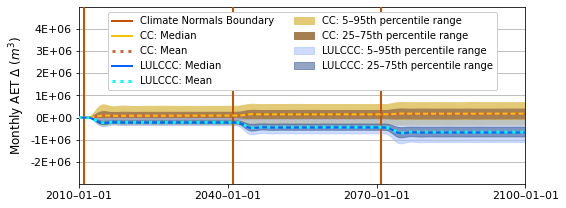

In [38]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 3.25)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinAET, MaxAET], linestyle='-', zorder=3,
           linewidth=2, color='xkcd:dark orange', label="Climate Normals Boundary")
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinAET, MaxAET], linestyle='-',
           linewidth=2, color='xkcd:dark orange', zorder=3 )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinAET, MaxAET], linestyle='-',
           linewidth=2, color='xkcd:dark orange', zorder=3 )
cc90 = ax11.fill( DTTimeList, CC_FlHR1_AET_90, color='xkcd:sand', alpha=1.0, 
                  label="CC: 5–95th percentile range", zorder=2)
cc50 = ax11.fill( DTTimeList, CC_FlHR1_AET_IQR, color='xkcd:puce', alpha=1.0, 
                  label="CC: 25–75th percentile range", zorder=2)
ax11.plot( ForTimeList, CC_BFHR1_AET_Med, linestyle='-', zorder=4,
           linewidth=2, color='xkcd:goldenrod', label='CC: Median' )
ax11.plot( ForTimeList, CC_BFHR1_AET_Ave, linestyle=':', zorder=4,
           linewidth=3, color='xkcd:terracotta', label='CC: Mean' )
ba90 = ax11.fill( DTTimeList, BA_FlHR1_AET_90, color='xkcd:pastel blue', alpha=0.55, 
                  label="LULCCC: 5–95th percentile range", zorder=2 )
ba50 = ax11.fill( DTTimeList, BA_FlHR1_AET_IQR, color='xkcd:denim blue', alpha=0.55, 
                  label="LULCCC: 25–75th percentile range", zorder=2 )
ax11.plot( ForTimeList, BA_BFHR1_AET_Med, linestyle='-', zorder=4,
           linewidth=2, color='xkcd:bright blue', label='LULCCC: Median' )
ax11.plot( ForTimeList, BA_BFHR1_AET_Ave, linestyle=':', zorder=4,
           linewidth=3, color='xkcd:cyan', label='LULCCC: Mean' )
ax11.set_xticks( [ dt.datetime(2010, 1, 1), dt.datetime(2040, 1, 1), dt.datetime(2070, 1, 1),
                  dt.datetime(2100, 1, 1) ] )
ax11.set_xlim( (dt.datetime(2010, 1, 1), dt.datetime(2100, 1, 1)))
ax11.set_yticks( aetTicks )
ax11.set_ylim( (MinAET, MaxAET) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Monthly AET $\Delta$ ($m^{3}$)', fontsize=12 )
ax11.legend( loc='upper center', fontsize=10, framealpha=1.0, ncol=2 )
ax11.tick_params(axis='both', which='major', labelsize=11 )
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0E}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y–%m–%d") )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

In [39]:
MaxRO = max( CC_BFHR1_RO_95.max(), BA_BFHR1_RO_95.max() )
MinRO = min( CC_BFHR1_RO_05.min(), BA_BFHR1_RO_05.min() )
MaxRO, MinRO

(4045613.90395436, -11182.04819858649)

In [40]:
MaxRO = 5000000
MinRO = -3000000

In [41]:
roTicks = [ -2000000, -1000000, 0.0, 1000000, 2000000, 3000000, 4000000 ]

In [42]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Results_CompHR1_RODelta.svg" ) )
OutSVG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Results_CompHR1_RODelta.svg'

In [43]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Results_CompHR1_RODelta.png" ) )
OutPNG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Results_CompHR1_RODelta.png'

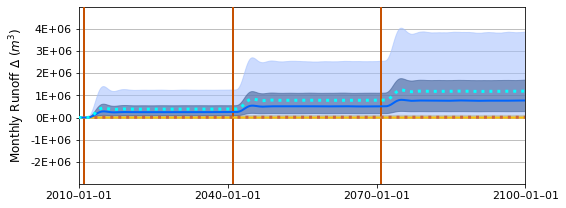

In [44]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 3.25)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinRO, MaxRO], linestyle='-', zorder=3,
           linewidth=2, color='xkcd:dark orange', label="Climate Normals Boundary")
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinRO, MaxRO], linestyle='-',
           linewidth=2, color='xkcd:dark orange', zorder=3 )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinRO, MaxRO], linestyle='-',
           linewidth=2, color='xkcd:dark orange', zorder=3 )
cc90 = ax11.fill( DTTimeList, CC_FlHR1_RO_90, color='xkcd:sand', alpha=1.0, 
                  label="CC: 5–95th percentile range", zorder=2)
cc50 = ax11.fill( DTTimeList, CC_FlHR1_RO_IQR, color='xkcd:puce', alpha=1.0, 
                  label="CC: 25–75th percentile range", zorder=2)
ax11.plot( ForTimeList, CC_BFHR1_RO_Med, linestyle='-', zorder=4,
           linewidth=2, color='xkcd:goldenrod', label='CC: Median' )
ax11.plot( ForTimeList, CC_BFHR1_RO_Ave, linestyle=':', zorder=4,
           linewidth=3, color='xkcd:terracotta', label='CC: Mean' )
ba90 = ax11.fill( DTTimeList, BA_FlHR1_RO_90, color='xkcd:pastel blue', alpha=0.55, 
                  label="LULCCC: 5–95th percentile range", zorder=2 )
ba50 = ax11.fill( DTTimeList, BA_FlHR1_RO_IQR, color='xkcd:denim blue', alpha=0.55, 
                  label="LULCCC: 25–75th percentile range", zorder=2 )
ax11.plot( ForTimeList, BA_BFHR1_RO_Med, linestyle='-', zorder=4,
           linewidth=2, color='xkcd:bright blue', label='LULCCC: Median' )
ax11.plot( ForTimeList, BA_BFHR1_RO_Ave, linestyle=':', zorder=4,
           linewidth=3, color='xkcd:cyan', label='LULCCC: Mean' )
ax11.set_xticks( [ dt.datetime(2010, 1, 1), dt.datetime(2040, 1, 1), dt.datetime(2070, 1, 1),
                  dt.datetime(2100, 1, 1) ] )
ax11.set_xlim( (dt.datetime(2010, 1, 1), dt.datetime(2100, 1, 1)))
ax11.set_yticks( roTicks )
ax11.set_ylim( (MinRO, MaxRO) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Monthly Runoff $\Delta$ ($m^{3}$)', fontsize=12 )
#ax11.legend( loc='upper center', fontsize=10, framealpha=1.0, ncol=3 )
ax11.tick_params(axis='both', which='major', labelsize=11 )
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0E}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y–%m–%d") )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

In [45]:
MaxRE = max( CC_BFHR1_RE_95.max(), BA_BFHR1_RE_95.max() )
MinRE = min( CC_BFHR1_RE_05.min(), BA_BFHR1_RE_05.min() )
MaxRE, MinRE

(2183189.609162512, -2495233.964369164)

In [46]:
MaxRE = 5000000
MinRE = -3000000

In [47]:
reTicks = [ -2000000, -1000000, 0.0, 1000000, 2000000, 3000000, 4000000 ]

In [48]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Results_CompHR1_REDelta.svg" ) )
OutSVG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Results_CompHR1_REDelta.svg'

In [49]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Results_CompHR1_REDelta.png" ) )
OutPNG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Results_CompHR1_REDelta.png'

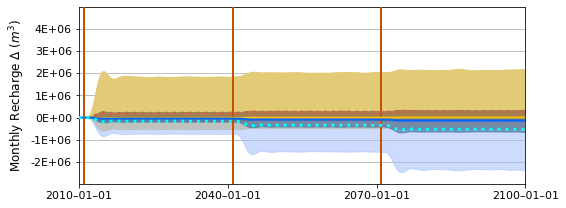

In [50]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 3.25)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinRE, MaxRE], linestyle='-', zorder=3,
           linewidth=2, color='xkcd:dark orange', label="Climate Normals Boundary")
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinRE, MaxRE], linestyle='-',
           linewidth=2, color='xkcd:dark orange', zorder=3 )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinRE, MaxRE], linestyle='-',
           linewidth=2, color='xkcd:dark orange', zorder=3 )
cc90 = ax11.fill( DTTimeList, CC_FlHR1_RE_90, color='xkcd:sand', alpha=1.0, 
                  label="CC: 5–95th percentile range", zorder=2)
cc50 = ax11.fill( DTTimeList, CC_FlHR1_RE_IQR, color='xkcd:puce', alpha=1.0, 
                  label="CC: 25–75th percentile range", zorder=2)
ax11.plot( ForTimeList, CC_BFHR1_RE_Med, linestyle='-', zorder=4,
           linewidth=2, color='xkcd:goldenrod', label='CC: Median' )
ax11.plot( ForTimeList, CC_BFHR1_RE_Ave, linestyle=':', zorder=4,
           linewidth=3, color='xkcd:terracotta', label='CC: Mean' )
ba90 = ax11.fill( DTTimeList, BA_FlHR1_RE_90, color='xkcd:pastel blue', alpha=0.55, 
                  label="LULCCC: 5–95th percentile range", zorder=2 )
ba50 = ax11.fill( DTTimeList, BA_FlHR1_RE_IQR, color='xkcd:denim blue', alpha=0.55, 
                  label="LULCCC: 25–75th percentile range", zorder=2 )
ax11.plot( ForTimeList, BA_BFHR1_RE_Med, linestyle='-', zorder=4,
           linewidth=2, color='xkcd:bright blue', label='LULCCC: Median' )
ax11.plot( ForTimeList, BA_BFHR1_RE_Ave, linestyle=':', zorder=4,
           linewidth=3, color='xkcd:cyan', label='LULCCC: Mean' )
ax11.set_xticks( [ dt.datetime(2010, 1, 1), dt.datetime(2040, 1, 1), dt.datetime(2070, 1, 1),
                  dt.datetime(2100, 1, 1) ] )
ax11.set_xlim( (dt.datetime(2010, 1, 1), dt.datetime(2100, 1, 1)))
ax11.set_yticks( reTicks )
ax11.set_ylim( (MinRE, MaxRE) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Monthly Recharge $\Delta$ ($m^{3}$)', fontsize=12 )
#ax11.legend( loc='upper center', fontsize=10, framealpha=1.0, ncol=3 )
ax11.tick_params(axis='both', which='major', labelsize=11 )
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0E}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y–%m–%d") )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

### HRU 2

In [51]:
InFiler = os.path.normpath( os.path.join( IN_DIR, XLSX_ROOT % ( REG_SIM_ROOT % "HR2" ) ) )
CCHR2_1_AET = pd.read_excel( InFiler, sheet_name="AET_1", header=0, names=RdHds, index_col=0, parse_dates=True )
CCHR2_2_AET = pd.read_excel( InFiler, sheet_name="AET_2", header=0, names=RdHds, index_col=0, parse_dates=True )
CCHR2_3_AET = pd.read_excel( InFiler, sheet_name="AET_3", header=0, names=RdHds, index_col=0, parse_dates=True )
CCHR2_4_AET = pd.read_excel( InFiler, sheet_name="AET_4", header=0, names=RdHds, index_col=0, parse_dates=True )
CCHR2_1_RO = pd.read_excel( InFiler, sheet_name="RO_1", header=0, names=RdHds, index_col=0, parse_dates=True )
CCHR2_2_RO = pd.read_excel( InFiler, sheet_name="RO_2", header=0, names=RdHds, index_col=0, parse_dates=True )
CCHR2_3_RO = pd.read_excel( InFiler, sheet_name="RO_3", header=0, names=RdHds, index_col=0, parse_dates=True )
CCHR2_4_RO = pd.read_excel( InFiler, sheet_name="RO_4", header=0, names=RdHds, index_col=0, parse_dates=True )
CCHR2_1_RE = pd.read_excel( InFiler, sheet_name="RE_1", header=0, names=RdHds, index_col=0, parse_dates=True )
CCHR2_2_RE = pd.read_excel( InFiler, sheet_name="RE_2", header=0, names=RdHds, index_col=0, parse_dates=True )
CCHR2_3_RE = pd.read_excel( InFiler, sheet_name="RE_3", header=0, names=RdHds, index_col=0, parse_dates=True )
CCHR2_4_RE = pd.read_excel( InFiler, sheet_name="RE_4", header=0, names=RdHds, index_col=0, parse_dates=True )

In [52]:
CCHR2_1_AET = CCHR2_1_AET * MultAFtoM3
CCHR2_2_AET = CCHR2_2_AET * MultAFtoM3
CCHR2_3_AET = CCHR2_3_AET * MultAFtoM3
CCHR2_4_AET = CCHR2_4_AET * MultAFtoM3
CCHR2_1_RO = CCHR2_1_RO * MultAFtoM3
CCHR2_2_RO = CCHR2_2_RO * MultAFtoM3
CCHR2_3_RO = CCHR2_3_RO * MultAFtoM3
CCHR2_4_RO = CCHR2_4_RO * MultAFtoM3
CCHR2_1_RE = CCHR2_1_RE * MultAFtoM3
CCHR2_2_RE = CCHR2_2_RE * MultAFtoM3
CCHR2_3_RE = CCHR2_3_RE * MultAFtoM3
CCHR2_4_RE = CCHR2_4_RE * MultAFtoM3

In [53]:
InFiler = os.path.normpath( os.path.join( IN_DIR, XLSX_ROOT % ( BAS_SIM_ROOT % "HR2" ) ) )
BAHR2_1_AET = pd.read_excel( InFiler, sheet_name="AET_1", header=0, names=RdHds, index_col=0, parse_dates=True )
BAHR2_2_AET = pd.read_excel( InFiler, sheet_name="AET_2", header=0, names=RdHds, index_col=0, parse_dates=True )
BAHR2_3_AET = pd.read_excel( InFiler, sheet_name="AET_3", header=0, names=RdHds, index_col=0, parse_dates=True )
BAHR2_4_AET = pd.read_excel( InFiler, sheet_name="AET_4", header=0, names=RdHds, index_col=0, parse_dates=True )
BAHR2_1_RO = pd.read_excel( InFiler, sheet_name="RO_1", header=0, names=RdHds, index_col=0, parse_dates=True )
BAHR2_2_RO = pd.read_excel( InFiler, sheet_name="RO_2", header=0, names=RdHds, index_col=0, parse_dates=True )
BAHR2_3_RO = pd.read_excel( InFiler, sheet_name="RO_3", header=0, names=RdHds, index_col=0, parse_dates=True )
BAHR2_4_RO = pd.read_excel( InFiler, sheet_name="RO_4", header=0, names=RdHds, index_col=0, parse_dates=True )
BAHR2_1_RE = pd.read_excel( InFiler, sheet_name="RE_1", header=0, names=RdHds, index_col=0, parse_dates=True )
BAHR2_2_RE = pd.read_excel( InFiler, sheet_name="RE_2", header=0, names=RdHds, index_col=0, parse_dates=True )
BAHR2_3_RE = pd.read_excel( InFiler, sheet_name="RE_3", header=0, names=RdHds, index_col=0, parse_dates=True )
BAHR2_4_RE = pd.read_excel( InFiler, sheet_name="RE_4", header=0, names=RdHds, index_col=0, parse_dates=True )

In [54]:
BAHR2_1_AET = BAHR2_1_AET * MultAFtoM3
BAHR2_2_AET = BAHR2_2_AET * MultAFtoM3
BAHR2_3_AET = BAHR2_3_AET * MultAFtoM3
BAHR2_4_AET = BAHR2_4_AET * MultAFtoM3
BAHR2_1_RO = BAHR2_1_RO * MultAFtoM3
BAHR2_2_RO = BAHR2_2_RO * MultAFtoM3
BAHR2_3_RO = BAHR2_3_RO * MultAFtoM3
BAHR2_4_RO = BAHR2_4_RO * MultAFtoM3
BAHR2_1_RE = BAHR2_1_RE * MultAFtoM3
BAHR2_2_RE = BAHR2_2_RE * MultAFtoM3
BAHR2_3_RE = BAHR2_3_RE * MultAFtoM3
BAHR2_4_RE = BAHR2_4_RE * MultAFtoM3

Make continuous time series

In [55]:
CCHR2_AET_DF = pd.concat( [CCHR2_1_AET, CCHR2_2_AET, CCHR2_3_AET, CCHR2_4_AET ])
CCHR2_RO_DF = pd.concat( [CCHR2_1_RO, CCHR2_2_RO, CCHR2_3_RO, CCHR2_4_RO ])
CCHR2_RE_DF = pd.concat( [CCHR2_1_RE, CCHR2_2_RE, CCHR2_3_RE, CCHR2_4_RE ])

In [56]:
BAHR2_AET_DF = pd.concat( [BAHR2_1_AET, BAHR2_2_AET, BAHR2_3_AET, BAHR2_4_AET ])
BAHR2_RO_DF = pd.concat( [BAHR2_1_RO, BAHR2_2_RO, BAHR2_3_RO, BAHR2_4_RO ])
BAHR2_RE_DF = pd.concat( [BAHR2_1_RE, BAHR2_2_RE, BAHR2_3_RE, BAHR2_4_RE ])

Butterworth filtering

In [57]:
wAr = CCHR2_AET_DF[StatsHdsList[95]].to_numpy()
CC_BFHR2_AET_95 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCHR2_AET_DF[StatsHdsList[5]].to_numpy()
CC_BFHR2_AET_05 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCHR2_AET_DF[StatsHdsList[75]].to_numpy()
CC_BFHR2_AET_75 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCHR2_AET_DF[StatsHdsList[25]].to_numpy()
CC_BFHR2_AET_25 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCHR2_AET_DF[StatsHdsList[50]].to_numpy()
CC_BFHR2_AET_Med = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCHR2_AET_DF[StatsHdsList[101]].to_numpy()
CC_BFHR2_AET_Ave = butter_lowpass_filter(wAr, CUTOFF, FS )

In [58]:
wAr = CCHR2_RO_DF[StatsHdsList[95]].to_numpy()
CC_BFHR2_RO_95 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCHR2_RO_DF[StatsHdsList[5]].to_numpy()
CC_BFHR2_RO_05 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCHR2_RO_DF[StatsHdsList[75]].to_numpy()
CC_BFHR2_RO_75 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCHR2_RO_DF[StatsHdsList[25]].to_numpy()
CC_BFHR2_RO_25 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCHR2_RO_DF[StatsHdsList[50]].to_numpy()
CC_BFHR2_RO_Med = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCHR2_RO_DF[StatsHdsList[101]].to_numpy()
CC_BFHR2_RO_Ave = butter_lowpass_filter(wAr, CUTOFF, FS )

In [59]:
wAr = CCHR2_RE_DF[StatsHdsList[95]].to_numpy()
CC_BFHR2_RE_95 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCHR2_RE_DF[StatsHdsList[5]].to_numpy()
CC_BFHR2_RE_05 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCHR2_RE_DF[StatsHdsList[75]].to_numpy()
CC_BFHR2_RE_75 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCHR2_RE_DF[StatsHdsList[25]].to_numpy()
CC_BFHR2_RE_25 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCHR2_RE_DF[StatsHdsList[50]].to_numpy()
CC_BFHR2_RE_Med = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCHR2_RE_DF[StatsHdsList[101]].to_numpy()
CC_BFHR2_RE_Ave = butter_lowpass_filter(wAr, CUTOFF, FS )

In [60]:
wAr = BAHR2_AET_DF[StatsHdsList[95]].to_numpy()
BA_BFHR2_AET_95 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BAHR2_AET_DF[StatsHdsList[5]].to_numpy()
BA_BFHR2_AET_05 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BAHR2_AET_DF[StatsHdsList[75]].to_numpy()
BA_BFHR2_AET_75 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BAHR2_AET_DF[StatsHdsList[25]].to_numpy()
BA_BFHR2_AET_25 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BAHR2_AET_DF[StatsHdsList[50]].to_numpy()
BA_BFHR2_AET_Med = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BAHR2_AET_DF[StatsHdsList[101]].to_numpy()
BA_BFHR2_AET_Ave = butter_lowpass_filter(wAr, CUTOFF, FS )

In [61]:
wAr = BAHR2_RO_DF[StatsHdsList[95]].to_numpy()
BA_BFHR2_RO_95 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BAHR2_RO_DF[StatsHdsList[5]].to_numpy()
BA_BFHR2_RO_05 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BAHR2_RO_DF[StatsHdsList[75]].to_numpy()
BA_BFHR2_RO_75 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BAHR2_RO_DF[StatsHdsList[25]].to_numpy()
BA_BFHR2_RO_25 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BAHR2_RO_DF[StatsHdsList[50]].to_numpy()
BA_BFHR2_RO_Med = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BAHR2_RO_DF[StatsHdsList[101]].to_numpy()
BA_BFHR2_RO_Ave = butter_lowpass_filter(wAr, CUTOFF, FS )

In [62]:
wAr = BAHR2_RE_DF[StatsHdsList[95]].to_numpy()
BA_BFHR2_RE_95 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BAHR2_RE_DF[StatsHdsList[5]].to_numpy()
BA_BFHR2_RE_05 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BAHR2_RE_DF[StatsHdsList[75]].to_numpy()
BA_BFHR2_RE_75 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BAHR2_RE_DF[StatsHdsList[25]].to_numpy()
BA_BFHR2_RE_25 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BAHR2_RE_DF[StatsHdsList[50]].to_numpy()
BA_BFHR2_RE_Med = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BAHR2_RE_DF[StatsHdsList[101]].to_numpy()
BA_BFHR2_RE_Ave = butter_lowpass_filter(wAr, CUTOFF, FS )

Make the polygons for fills

In [63]:
CC_FlHR2_AET_90 = list( CC_BFHR2_AET_05 )
BackDTList = list( CC_BFHR2_AET_95 )
CC_BkFlHR2_AET_90 = BackDTList[::-1]
CC_FlHR2_AET_90.extend( CC_BkFlHR2_AET_90 )
CC_FlHR2_AET_IQR = list( CC_BFHR2_AET_25 )
BackDTList = list( CC_BFHR2_AET_75 )
CC_BkFlHR2_AET_IQR = BackDTList[::-1]
CC_FlHR2_AET_IQR.extend( CC_BkFlHR2_AET_IQR )

In [64]:
CC_FlHR2_RO_90 = list( CC_BFHR2_RO_05 )
BackDTList = list( CC_BFHR2_RO_95 )
CC_BkFlHR2_RO_90 = BackDTList[::-1]
CC_FlHR2_RO_90.extend( CC_BkFlHR2_RO_90 )
CC_FlHR2_RO_IQR = list( CC_BFHR2_RO_25 )
BackDTList = list( CC_BFHR2_RO_75 )
CC_BkFlHR2_RO_IQR = BackDTList[::-1]
CC_FlHR2_RO_IQR.extend( CC_BkFlHR2_RO_IQR )

In [65]:
CC_FlHR2_RE_90 = list( CC_BFHR2_RE_05 )
BackDTList = list( CC_BFHR2_RE_95 )
CC_BkFlHR2_RE_90 = BackDTList[::-1]
CC_FlHR2_RE_90.extend( CC_BkFlHR2_RE_90 )
CC_FlHR2_RE_IQR = list( CC_BFHR2_RE_25 )
BackDTList = list( CC_BFHR2_RE_75 )
CC_BkFlHR2_RE_IQR = BackDTList[::-1]
CC_FlHR2_RE_IQR.extend( CC_BkFlHR2_RE_IQR )

In [66]:
BA_FlHR2_AET_90 = list( BA_BFHR2_AET_05 )
BackDTList = list( BA_BFHR2_AET_95 )
BA_BkFlHR2_AET_90 = BackDTList[::-1]
BA_FlHR2_AET_90.extend( BA_BkFlHR2_AET_90 )
BA_FlHR2_AET_IQR = list( BA_BFHR2_AET_25 )
BackDTList = list( BA_BFHR2_AET_75 )
BA_BkFlHR2_AET_IQR = BackDTList[::-1]
BA_FlHR2_AET_IQR.extend( BA_BkFlHR2_AET_IQR )

In [67]:
BA_FlHR2_RO_90 = list( BA_BFHR2_RO_05 )
BackDTList = list( BA_BFHR2_RO_95 )
BA_BkFlHR2_RO_90 = BackDTList[::-1]
BA_FlHR2_RO_90.extend( BA_BkFlHR2_RO_90 )
BA_FlHR2_RO_IQR = list( BA_BFHR2_RO_25 )
BackDTList = list( BA_BFHR2_RO_75 )
BA_BkFlHR2_RO_IQR = BackDTList[::-1]
BA_FlHR2_RO_IQR.extend( BA_BkFlHR2_RO_IQR )

In [68]:
BA_FlHR2_RE_90 = list( BA_BFHR2_RE_05 )
BackDTList = list( BA_BFHR2_RE_95 )
BA_BkFlHR2_RE_90 = BackDTList[::-1]
BA_FlHR2_RE_90.extend( BA_BkFlHR2_RE_90 )
BA_FlHR2_RE_IQR = list( BA_BFHR2_RE_25 )
BackDTList = list( BA_BFHR2_RE_75 )
BA_BkFlHR2_RE_IQR = BackDTList[::-1]
BA_FlHR2_RE_IQR.extend( BA_BkFlHR2_RE_IQR )

#### Plots

In [94]:
MaxAET = max( CC_BFHR2_AET_95.max(), BA_BFHR2_AET_95.max() )
MinAET = min( CC_BFHR2_AET_05.min(), BA_BFHR2_AET_05.min() )
MaxAET, MinAET

(286240.09192057204, -501498.6229623591)

In [95]:
MaxAET = 2000000.0
MinAET = -1500000.0

In [96]:
aetTicks = [ -1000000.0, -500000.0, 0.0, 500000.0, 1000000.0, 1500000.0 ]

In [97]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Results_CompHR2_AETDelta.svg" ) )
OutSVG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Results_CompHR2_AETDelta.svg'

In [98]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Results_CompHR2_AETDelta.png" ) )
OutPNG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Results_CompHR2_AETDelta.png'

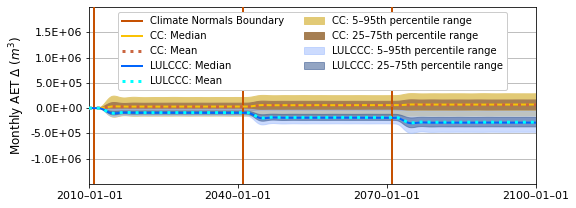

In [99]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 3.25)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinAET, MaxAET], linestyle='-', zorder=3,
           linewidth=2, color='xkcd:dark orange', label="Climate Normals Boundary")
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinAET, MaxAET], linestyle='-',
           linewidth=2, color='xkcd:dark orange', zorder=3 )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinAET, MaxAET], linestyle='-',
           linewidth=2, color='xkcd:dark orange', zorder=3 )
cc90 = ax11.fill( DTTimeList, CC_FlHR2_AET_90, color='xkcd:sand', alpha=1.0, 
                  label="CC: 5–95th percentile range", zorder=2)
cc50 = ax11.fill( DTTimeList, CC_FlHR2_AET_IQR, color='xkcd:puce', alpha=1.0, 
                  label="CC: 25–75th percentile range", zorder=2)
ax11.plot( ForTimeList, CC_BFHR2_AET_Med, linestyle='-', zorder=4,
           linewidth=2, color='xkcd:goldenrod', label='CC: Median' )
ax11.plot( ForTimeList, CC_BFHR2_AET_Ave, linestyle=':', zorder=4,
           linewidth=3, color='xkcd:terracotta', label='CC: Mean' )
ba90 = ax11.fill( DTTimeList, BA_FlHR2_AET_90, color='xkcd:pastel blue', alpha=0.55, 
                  label="LULCCC: 5–95th percentile range", zorder=2 )
ba50 = ax11.fill( DTTimeList, BA_FlHR2_AET_IQR, color='xkcd:denim blue', alpha=0.55, 
                  label="LULCCC: 25–75th percentile range", zorder=2 )
ax11.plot( ForTimeList, BA_BFHR2_AET_Med, linestyle='-', zorder=4,
           linewidth=2, color='xkcd:bright blue', label='LULCCC: Median' )
ax11.plot( ForTimeList, BA_BFHR2_AET_Ave, linestyle=':', zorder=4,
           linewidth=3, color='xkcd:cyan', label='LULCCC: Mean' )
ax11.set_xticks( [ dt.datetime(2010, 1, 1), dt.datetime(2040, 1, 1), dt.datetime(2070, 1, 1),
                  dt.datetime(2100, 1, 1) ] )
ax11.set_xlim( (dt.datetime(2010, 1, 1), dt.datetime(2100, 1, 1)))
ax11.set_yticks( aetTicks )
ax11.set_ylim( (MinAET, MaxAET) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Monthly AET $\Delta$ ($m^{3}$)', fontsize=12 )
ax11.legend( loc='upper center', fontsize=10, framealpha=1.0, ncol=2 )
ax11.tick_params(axis='both', which='major', labelsize=11 )
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1E}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y–%m–%d") )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

In [100]:
MaxRO = max( CC_BFHR2_RO_95.max(), BA_BFHR2_RO_95.max() )
MinRO = min( CC_BFHR2_RO_05.min(), BA_BFHR2_RO_05.min() )
MaxRO, MinRO

(1747841.7501347733, -6722.316644993665)

In [101]:
MaxRO = 2000000.0
MinRO = -1500000.0

In [102]:
roTicks = [ -1000000.0, -500000.0, 0.0, 500000.0, 1000000.0, 1500000.0 ]

In [103]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Results_CompHR2_RODelta.svg" ) )
OutSVG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Results_CompHR2_RODelta.svg'

In [104]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Results_CompHR2_RODelta.png" ) )
OutPNG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Results_CompHR2_RODelta.png'

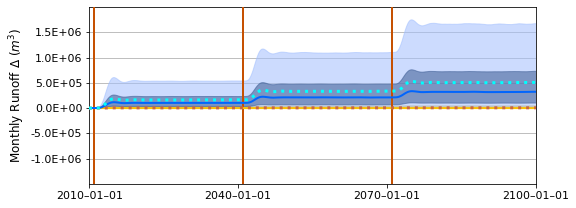

In [105]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 3.25)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinRO, MaxRO], linestyle='-', zorder=3,
           linewidth=2, color='xkcd:dark orange', label="Climate Normals Boundary")
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinRO, MaxRO], linestyle='-',
           linewidth=2, color='xkcd:dark orange', zorder=3 )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinRO, MaxRO], linestyle='-',
           linewidth=2, color='xkcd:dark orange', zorder=3 )
cc90 = ax11.fill( DTTimeList, CC_FlHR2_RO_90, color='xkcd:sand', alpha=1.0, 
                  label="CC: 5–95th percentile range", zorder=2)
cc50 = ax11.fill( DTTimeList, CC_FlHR2_RO_IQR, color='xkcd:puce', alpha=1.0, 
                  label="CC: 25–75th percentile range", zorder=2)
ax11.plot( ForTimeList, CC_BFHR2_RO_Med, linestyle='-', zorder=4,
           linewidth=2, color='xkcd:goldenrod', label='CC: Median' )
ax11.plot( ForTimeList, CC_BFHR2_RO_Ave, linestyle=':', zorder=4,
           linewidth=3, color='xkcd:terracotta', label='CC: Mean' )
ba90 = ax11.fill( DTTimeList, BA_FlHR2_RO_90, color='xkcd:pastel blue', alpha=0.55, 
                  label="LULCCC: 5–95th percentile range", zorder=2 )
ba50 = ax11.fill( DTTimeList, BA_FlHR2_RO_IQR, color='xkcd:denim blue', alpha=0.55, 
                  label="LULCCC: 25–75th percentile range", zorder=2 )
ax11.plot( ForTimeList, BA_BFHR2_RO_Med, linestyle='-', zorder=4,
           linewidth=2, color='xkcd:bright blue', label='LULCCC: Median' )
ax11.plot( ForTimeList, BA_BFHR2_RO_Ave, linestyle=':', zorder=4,
           linewidth=3, color='xkcd:cyan', label='LULCCC: Mean' )
ax11.set_xticks( [ dt.datetime(2010, 1, 1), dt.datetime(2040, 1, 1), dt.datetime(2070, 1, 1),
                  dt.datetime(2100, 1, 1) ] )
ax11.set_xlim( (dt.datetime(2010, 1, 1), dt.datetime(2100, 1, 1)))
ax11.set_yticks( roTicks )
ax11.set_ylim( (MinRO, MaxRO) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Monthly Runoff $\Delta$ ($m^{3}$)', fontsize=12 )
#ax11.legend( loc='upper center', fontsize=10, framealpha=1.0, ncol=3 )
ax11.tick_params(axis='both', which='major', labelsize=11 )
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1E}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y–%m–%d") )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

In [106]:
MaxRE = max( CC_BFHR2_RE_95.max(), BA_BFHR2_RE_95.max() )
MinRE = min( CC_BFHR2_RE_05.min(), BA_BFHR2_RE_05.min() )
MaxRE, MinRE

(890362.6950821339, -1063141.583337032)

In [107]:
MaxRE = 2000000.0
MinRE = -1500000.0

In [108]:
reTicks = [ -1000000.0, -500000.0, 0.0, 500000.0, 1000000.0, 1500000.0 ]

In [109]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Results_CompHR2_REDelta.svg" ) )
OutSVG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Results_CompHR2_REDelta.svg'

In [110]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Results_CompHR2_REDelta.png" ) )
OutPNG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Results_CompHR2_REDelta.png'

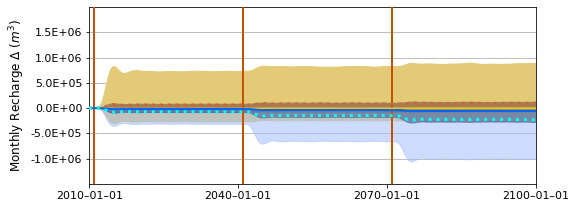

In [111]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 3.25)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinRE, MaxRE], linestyle='-', zorder=3,
           linewidth=2, color='xkcd:dark orange', label="Climate Normals Boundary")
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinRE, MaxRE], linestyle='-',
           linewidth=2, color='xkcd:dark orange', zorder=3 )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinRE, MaxRE], linestyle='-',
           linewidth=2, color='xkcd:dark orange', zorder=3 )
cc90 = ax11.fill( DTTimeList, CC_FlHR2_RE_90, color='xkcd:sand', alpha=1.0, 
                  label="CC: 5–95th percentile range", zorder=2)
cc50 = ax11.fill( DTTimeList, CC_FlHR2_RE_IQR, color='xkcd:puce', alpha=1.0, 
                  label="CC: 25–75th percentile range", zorder=2)
ax11.plot( ForTimeList, CC_BFHR2_RE_Med, linestyle='-', zorder=4,
           linewidth=2, color='xkcd:goldenrod', label='CC: Median' )
ax11.plot( ForTimeList, CC_BFHR2_RE_Ave, linestyle=':', zorder=4,
           linewidth=3, color='xkcd:terracotta', label='CC: Mean' )
ba90 = ax11.fill( DTTimeList, BA_FlHR2_RE_90, color='xkcd:pastel blue', alpha=0.55, 
                  label="LULCCC: 5–95th percentile range", zorder=2 )
ba50 = ax11.fill( DTTimeList, BA_FlHR2_RE_IQR, color='xkcd:denim blue', alpha=0.55, 
                  label="LULCCC: 25–75th percentile range", zorder=2 )
ax11.plot( ForTimeList, BA_BFHR2_RE_Med, linestyle='-', zorder=4,
           linewidth=2, color='xkcd:bright blue', label='LULCCC: Median' )
ax11.plot( ForTimeList, BA_BFHR2_RE_Ave, linestyle=':', zorder=4,
           linewidth=3, color='xkcd:cyan', label='LULCCC: Mean' )
ax11.set_xticks( [ dt.datetime(2010, 1, 1), dt.datetime(2040, 1, 1), dt.datetime(2070, 1, 1),
                  dt.datetime(2100, 1, 1) ] )
ax11.set_xlim( (dt.datetime(2010, 1, 1), dt.datetime(2100, 1, 1)))
ax11.set_yticks( reTicks )
ax11.set_ylim( (MinRE, MaxRE) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Monthly Recharge $\Delta$ ($m^{3}$)', fontsize=12 )
#ax11.legend( loc='upper center', fontsize=10, framealpha=1.0, ncol=3 )
ax11.tick_params(axis='both', which='major', labelsize=11 )
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1E}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y–%m–%d") )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

### Reach 1

In [112]:
InFiler = os.path.normpath( os.path.join( IN_DIR, XLSX_ROOT % ( REG_SIM_ROOT % "RR1" ) ) )
CCRR1_1_AET = pd.read_excel( InFiler, sheet_name="AET_1", header=0, names=RdHds, index_col=0, parse_dates=True )
CCRR1_2_AET = pd.read_excel( InFiler, sheet_name="AET_2", header=0, names=RdHds, index_col=0, parse_dates=True )
CCRR1_3_AET = pd.read_excel( InFiler, sheet_name="AET_3", header=0, names=RdHds, index_col=0, parse_dates=True )
CCRR1_4_AET = pd.read_excel( InFiler, sheet_name="AET_4", header=0, names=RdHds, index_col=0, parse_dates=True )
CCRR1_1_RO = pd.read_excel( InFiler, sheet_name="RO_1", header=0, names=RdHds, index_col=0, parse_dates=True )
CCRR1_2_RO = pd.read_excel( InFiler, sheet_name="RO_2", header=0, names=RdHds, index_col=0, parse_dates=True )
CCRR1_3_RO = pd.read_excel( InFiler, sheet_name="RO_3", header=0, names=RdHds, index_col=0, parse_dates=True )
CCRR1_4_RO = pd.read_excel( InFiler, sheet_name="RO_4", header=0, names=RdHds, index_col=0, parse_dates=True )
CCRR1_1_RE = pd.read_excel( InFiler, sheet_name="RE_1", header=0, names=RdHds, index_col=0, parse_dates=True )
CCRR1_2_RE = pd.read_excel( InFiler, sheet_name="RE_2", header=0, names=RdHds, index_col=0, parse_dates=True )
CCRR1_3_RE = pd.read_excel( InFiler, sheet_name="RE_3", header=0, names=RdHds, index_col=0, parse_dates=True )
CCRR1_4_RE = pd.read_excel( InFiler, sheet_name="RE_4", header=0, names=RdHds, index_col=0, parse_dates=True )

In [113]:
CCRR1_1_AET = CCRR1_1_AET * MultAFtoM3
CCRR1_2_AET = CCRR1_2_AET * MultAFtoM3
CCRR1_3_AET = CCRR1_3_AET * MultAFtoM3
CCRR1_4_AET = CCRR1_4_AET * MultAFtoM3
CCRR1_1_RO = CCRR1_1_RO * MultAFtoM3
CCRR1_2_RO = CCRR1_2_RO * MultAFtoM3
CCRR1_3_RO = CCRR1_3_RO * MultAFtoM3
CCRR1_4_RO = CCRR1_4_RO * MultAFtoM3
CCRR1_1_RE = CCRR1_1_RE * MultAFtoM3
CCRR1_2_RE = CCRR1_2_RE * MultAFtoM3
CCRR1_3_RE = CCRR1_3_RE * MultAFtoM3
CCRR1_4_RE = CCRR1_4_RE * MultAFtoM3

In [114]:
InFiler = os.path.normpath( os.path.join( IN_DIR, XLSX_ROOT % ( BAS_SIM_ROOT % "RR1" ) ) )
BARR1_1_AET = pd.read_excel( InFiler, sheet_name="AET_1", header=0, names=RdHds, index_col=0, parse_dates=True )
BARR1_2_AET = pd.read_excel( InFiler, sheet_name="AET_2", header=0, names=RdHds, index_col=0, parse_dates=True )
BARR1_3_AET = pd.read_excel( InFiler, sheet_name="AET_3", header=0, names=RdHds, index_col=0, parse_dates=True )
BARR1_4_AET = pd.read_excel( InFiler, sheet_name="AET_4", header=0, names=RdHds, index_col=0, parse_dates=True )
BARR1_1_RO = pd.read_excel( InFiler, sheet_name="RO_1", header=0, names=RdHds, index_col=0, parse_dates=True )
BARR1_2_RO = pd.read_excel( InFiler, sheet_name="RO_2", header=0, names=RdHds, index_col=0, parse_dates=True )
BARR1_3_RO = pd.read_excel( InFiler, sheet_name="RO_3", header=0, names=RdHds, index_col=0, parse_dates=True )
BARR1_4_RO = pd.read_excel( InFiler, sheet_name="RO_4", header=0, names=RdHds, index_col=0, parse_dates=True )
BARR1_1_RE = pd.read_excel( InFiler, sheet_name="RE_1", header=0, names=RdHds, index_col=0, parse_dates=True )
BARR1_2_RE = pd.read_excel( InFiler, sheet_name="RE_2", header=0, names=RdHds, index_col=0, parse_dates=True )
BARR1_3_RE = pd.read_excel( InFiler, sheet_name="RE_3", header=0, names=RdHds, index_col=0, parse_dates=True )
BARR1_4_RE = pd.read_excel( InFiler, sheet_name="RE_4", header=0, names=RdHds, index_col=0, parse_dates=True )

In [115]:
BARR1_1_AET = BARR1_1_AET * MultAFtoM3
BARR1_2_AET = BARR1_2_AET * MultAFtoM3
BARR1_3_AET = BARR1_3_AET * MultAFtoM3
BARR1_4_AET = BARR1_4_AET * MultAFtoM3
BARR1_1_RO = BARR1_1_RO * MultAFtoM3
BARR1_2_RO = BARR1_2_RO * MultAFtoM3
BARR1_3_RO = BARR1_3_RO * MultAFtoM3
BARR1_4_RO = BARR1_4_RO * MultAFtoM3
BARR1_1_RE = BARR1_1_RE * MultAFtoM3
BARR1_2_RE = BARR1_2_RE * MultAFtoM3
BARR1_3_RE = BARR1_3_RE * MultAFtoM3
BARR1_4_RE = BARR1_4_RE * MultAFtoM3

Make continuous time series

In [116]:
CCRR1_AET_DF = pd.concat( [CCRR1_1_AET, CCRR1_2_AET, CCRR1_3_AET, CCRR1_4_AET ])
CCRR1_RO_DF = pd.concat( [CCRR1_1_RO, CCRR1_2_RO, CCRR1_3_RO, CCRR1_4_RO ])
CCRR1_RE_DF = pd.concat( [CCRR1_1_RE, CCRR1_2_RE, CCRR1_3_RE, CCRR1_4_RE ])

In [117]:
BARR1_AET_DF = pd.concat( [BARR1_1_AET, BARR1_2_AET, BARR1_3_AET, BARR1_4_AET ])
BARR1_RO_DF = pd.concat( [BARR1_1_RO, BARR1_2_RO, BARR1_3_RO, BARR1_4_RO ])
BARR1_RE_DF = pd.concat( [BARR1_1_RE, BARR1_2_RE, BARR1_3_RE, BARR1_4_RE ])

Butterworth filtering

In [118]:
wAr = CCRR1_AET_DF[StatsHdsList[95]].to_numpy()
CC_BFRR1_AET_95 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCRR1_AET_DF[StatsHdsList[5]].to_numpy()
CC_BFRR1_AET_05 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCRR1_AET_DF[StatsHdsList[75]].to_numpy()
CC_BFRR1_AET_75 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCRR1_AET_DF[StatsHdsList[25]].to_numpy()
CC_BFRR1_AET_25 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCRR1_AET_DF[StatsHdsList[50]].to_numpy()
CC_BFRR1_AET_Med = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCRR1_AET_DF[StatsHdsList[101]].to_numpy()
CC_BFRR1_AET_Ave = butter_lowpass_filter(wAr, CUTOFF, FS )

In [119]:
wAr = CCRR1_RO_DF[StatsHdsList[95]].to_numpy()
CC_BFRR1_RO_95 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCRR1_RO_DF[StatsHdsList[5]].to_numpy()
CC_BFRR1_RO_05 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCRR1_RO_DF[StatsHdsList[75]].to_numpy()
CC_BFRR1_RO_75 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCRR1_RO_DF[StatsHdsList[25]].to_numpy()
CC_BFRR1_RO_25 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCRR1_RO_DF[StatsHdsList[50]].to_numpy()
CC_BFRR1_RO_Med = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCRR1_RO_DF[StatsHdsList[101]].to_numpy()
CC_BFRR1_RO_Ave = butter_lowpass_filter(wAr, CUTOFF, FS )

In [120]:
wAr = CCRR1_RE_DF[StatsHdsList[95]].to_numpy()
CC_BFRR1_RE_95 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCRR1_RE_DF[StatsHdsList[5]].to_numpy()
CC_BFRR1_RE_05 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCRR1_RE_DF[StatsHdsList[75]].to_numpy()
CC_BFRR1_RE_75 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCRR1_RE_DF[StatsHdsList[25]].to_numpy()
CC_BFRR1_RE_25 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCRR1_RE_DF[StatsHdsList[50]].to_numpy()
CC_BFRR1_RE_Med = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCRR1_RE_DF[StatsHdsList[101]].to_numpy()
CC_BFRR1_RE_Ave = butter_lowpass_filter(wAr, CUTOFF, FS )

In [121]:
wAr = BARR1_AET_DF[StatsHdsList[95]].to_numpy()
BA_BFRR1_AET_95 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BARR1_AET_DF[StatsHdsList[5]].to_numpy()
BA_BFRR1_AET_05 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BARR1_AET_DF[StatsHdsList[75]].to_numpy()
BA_BFRR1_AET_75 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BARR1_AET_DF[StatsHdsList[25]].to_numpy()
BA_BFRR1_AET_25 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BARR1_AET_DF[StatsHdsList[50]].to_numpy()
BA_BFRR1_AET_Med = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BARR1_AET_DF[StatsHdsList[101]].to_numpy()
BA_BFRR1_AET_Ave = butter_lowpass_filter(wAr, CUTOFF, FS )

In [122]:
wAr = BARR1_RO_DF[StatsHdsList[95]].to_numpy()
BA_BFRR1_RO_95 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BARR1_RO_DF[StatsHdsList[5]].to_numpy()
BA_BFRR1_RO_05 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BARR1_RO_DF[StatsHdsList[75]].to_numpy()
BA_BFRR1_RO_75 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BARR1_RO_DF[StatsHdsList[25]].to_numpy()
BA_BFRR1_RO_25 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BARR1_RO_DF[StatsHdsList[50]].to_numpy()
BA_BFRR1_RO_Med = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BARR1_RO_DF[StatsHdsList[101]].to_numpy()
BA_BFRR1_RO_Ave = butter_lowpass_filter(wAr, CUTOFF, FS )

In [123]:
wAr = BARR1_RE_DF[StatsHdsList[95]].to_numpy()
BA_BFRR1_RE_95 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BARR1_RE_DF[StatsHdsList[5]].to_numpy()
BA_BFRR1_RE_05 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BARR1_RE_DF[StatsHdsList[75]].to_numpy()
BA_BFRR1_RE_75 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BARR1_RE_DF[StatsHdsList[25]].to_numpy()
BA_BFRR1_RE_25 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BARR1_RE_DF[StatsHdsList[50]].to_numpy()
BA_BFRR1_RE_Med = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BARR1_RE_DF[StatsHdsList[101]].to_numpy()
BA_BFRR1_RE_Ave = butter_lowpass_filter(wAr, CUTOFF, FS )

Make the polygons for fills

In [124]:
CC_FlRR1_AET_90 = list( CC_BFRR1_AET_05 )
BackDTList = list( CC_BFRR1_AET_95 )
CC_BkFlRR1_AET_90 = BackDTList[::-1]
CC_FlRR1_AET_90.extend( CC_BkFlRR1_AET_90 )
CC_FlRR1_AET_IQR = list( CC_BFRR1_AET_25 )
BackDTList = list( CC_BFRR1_AET_75 )
CC_BkFlRR1_AET_IQR = BackDTList[::-1]
CC_FlRR1_AET_IQR.extend( CC_BkFlRR1_AET_IQR )

In [125]:
CC_FlRR1_RO_90 = list( CC_BFRR1_RO_05 )
BackDTList = list( CC_BFRR1_RO_95 )
CC_BkFlRR1_RO_90 = BackDTList[::-1]
CC_FlRR1_RO_90.extend( CC_BkFlRR1_RO_90 )
CC_FlRR1_RO_IQR = list( CC_BFRR1_RO_25 )
BackDTList = list( CC_BFRR1_RO_75 )
CC_BkFlRR1_RO_IQR = BackDTList[::-1]
CC_FlRR1_RO_IQR.extend( CC_BkFlRR1_RO_IQR )

In [126]:
CC_FlRR1_RE_90 = list( CC_BFRR1_RE_05 )
BackDTList = list( CC_BFRR1_RE_95 )
CC_BkFlRR1_RE_90 = BackDTList[::-1]
CC_FlRR1_RE_90.extend( CC_BkFlRR1_RE_90 )
CC_FlRR1_RE_IQR = list( CC_BFRR1_RE_25 )
BackDTList = list( CC_BFRR1_RE_75 )
CC_BkFlRR1_RE_IQR = BackDTList[::-1]
CC_FlRR1_RE_IQR.extend( CC_BkFlRR1_RE_IQR )

In [127]:
BA_FlRR1_AET_90 = list( BA_BFRR1_AET_05 )
BackDTList = list( BA_BFRR1_AET_95 )
BA_BkFlRR1_AET_90 = BackDTList[::-1]
BA_FlRR1_AET_90.extend( BA_BkFlRR1_AET_90 )
BA_FlRR1_AET_IQR = list( BA_BFRR1_AET_25 )
BackDTList = list( BA_BFRR1_AET_75 )
BA_BkFlRR1_AET_IQR = BackDTList[::-1]
BA_FlRR1_AET_IQR.extend( BA_BkFlRR1_AET_IQR )

In [128]:
BA_FlRR1_RO_90 = list( BA_BFRR1_RO_05 )
BackDTList = list( BA_BFRR1_RO_95 )
BA_BkFlRR1_RO_90 = BackDTList[::-1]
BA_FlRR1_RO_90.extend( BA_BkFlRR1_RO_90 )
BA_FlRR1_RO_IQR = list( BA_BFRR1_RO_25 )
BackDTList = list( BA_BFRR1_RO_75 )
BA_BkFlRR1_RO_IQR = BackDTList[::-1]
BA_FlRR1_RO_IQR.extend( BA_BkFlRR1_RO_IQR )

In [129]:
BA_FlRR1_RE_90 = list( BA_BFRR1_RE_05 )
BackDTList = list( BA_BFRR1_RE_95 )
BA_BkFlRR1_RE_90 = BackDTList[::-1]
BA_FlRR1_RE_90.extend( BA_BkFlRR1_RE_90 )
BA_FlRR1_RE_IQR = list( BA_BFRR1_RE_25 )
BackDTList = list( BA_BFRR1_RE_75 )
BA_BkFlRR1_RE_IQR = BackDTList[::-1]
BA_FlRR1_RE_IQR.extend( BA_BkFlRR1_RE_IQR )

#### Plots

In [161]:
MaxAET = max( CC_BFRR1_AET_95.max(), BA_BFRR1_AET_95.max() )
MinAET = min( CC_BFRR1_AET_05.min(), BA_BFRR1_AET_05.min() )
MaxAET, MinAET

(220516.34667239457, -1126.832553909557)

In [162]:
MaxAET = 8000000.0
MinAET = -4000000.0

In [163]:
aetTicks = [ -2000000.0, 0.0, 2000000.0, 4000000.0, 6000000.0 ]

In [164]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Results_CompRR1_AETDelta.svg" ) )
OutSVG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Results_CompRR1_AETDelta.svg'

In [165]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Results_CompRR1_AETDelta.png" ) )
OutPNG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Results_CompRR1_AETDelta.png'

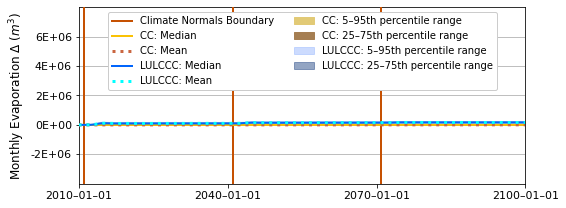

In [166]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 3.25)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinAET, MaxAET], linestyle='-', zorder=3,
           linewidth=2, color='xkcd:dark orange', label="Climate Normals Boundary")
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinAET, MaxAET], linestyle='-',
           linewidth=2, color='xkcd:dark orange', zorder=3 )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinAET, MaxAET], linestyle='-',
           linewidth=2, color='xkcd:dark orange', zorder=3 )
cc90 = ax11.fill( DTTimeList, CC_FlRR1_AET_90, color='xkcd:sand', alpha=1.0, 
                  label="CC: 5–95th percentile range", zorder=2)
cc50 = ax11.fill( DTTimeList, CC_FlRR1_AET_IQR, color='xkcd:puce', alpha=1.0, 
                  label="CC: 25–75th percentile range", zorder=2)
ax11.plot( ForTimeList, CC_BFRR1_AET_Med, linestyle='-', zorder=4,
           linewidth=2, color='xkcd:goldenrod', label='CC: Median' )
ax11.plot( ForTimeList, CC_BFRR1_AET_Ave, linestyle=':', zorder=4,
           linewidth=3, color='xkcd:terracotta', label='CC: Mean' )
ba90 = ax11.fill( DTTimeList, BA_FlRR1_AET_90, color='xkcd:pastel blue', alpha=0.55, 
                  label="LULCCC: 5–95th percentile range", zorder=2 )
ba50 = ax11.fill( DTTimeList, BA_FlRR1_AET_IQR, color='xkcd:denim blue', alpha=0.55, 
                  label="LULCCC: 25–75th percentile range", zorder=2 )
ax11.plot( ForTimeList, BA_BFRR1_AET_Med, linestyle='-', zorder=4,
           linewidth=2, color='xkcd:bright blue', label='LULCCC: Median' )
ax11.plot( ForTimeList, BA_BFRR1_AET_Ave, linestyle=':', zorder=4,
           linewidth=3, color='xkcd:cyan', label='LULCCC: Mean' )
ax11.set_xticks( [ dt.datetime(2010, 1, 1), dt.datetime(2040, 1, 1), dt.datetime(2070, 1, 1),
                  dt.datetime(2100, 1, 1) ] )
ax11.set_xlim( (dt.datetime(2010, 1, 1), dt.datetime(2100, 1, 1)))
ax11.set_yticks( aetTicks )
ax11.set_ylim( (MinAET, MaxAET) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Monthly Evaporation $\Delta$ ($m^{3}$)', fontsize=12 )
ax11.legend( loc='upper center', fontsize=10, framealpha=1.0, ncol=2 )
ax11.tick_params(axis='both', which='major', labelsize=11 )
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0E}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y–%m–%d") )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

In [167]:
MaxRO = max( CC_BFRR1_RO_95.max(), BA_BFRR1_RO_95.max() )
MinRO = min( CC_BFRR1_RO_05.min(), BA_BFRR1_RO_05.min() )
MaxRO, MinRO

(5455174.160052206, -4317.675783325433)

In [168]:
MaxRO = 8000000.0
MinRO = -4000000.0

In [169]:
roTicks = [ -2000000.0, 0.0, 2000000.0, 4000000.0, 6000000.0 ]

In [170]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Results_CompRR1_RODelta.svg" ) )
OutSVG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Results_CompRR1_RODelta.svg'

In [171]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Results_CompRR1_RODelta.png" ) )
OutPNG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Results_CompRR1_RODelta.png'

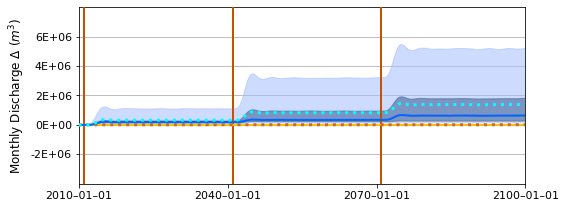

In [172]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 3.25)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinRO, MaxRO], linestyle='-', zorder=3,
           linewidth=2, color='xkcd:dark orange', label="Climate Normals Boundary")
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinRO, MaxRO], linestyle='-',
           linewidth=2, color='xkcd:dark orange', zorder=3 )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinRO, MaxRO], linestyle='-',
           linewidth=2, color='xkcd:dark orange', zorder=3 )
cc90 = ax11.fill( DTTimeList, CC_FlRR1_RO_90, color='xkcd:sand', alpha=1.0, 
                  label="CC: 5–95th percentile range", zorder=2)
cc50 = ax11.fill( DTTimeList, CC_FlRR1_RO_IQR, color='xkcd:puce', alpha=1.0, 
                  label="CC: 25–75th percentile range", zorder=2)
ax11.plot( ForTimeList, CC_BFRR1_RO_Med, linestyle='-', zorder=4,
           linewidth=2, color='xkcd:goldenrod', label='CC: Median' )
ax11.plot( ForTimeList, CC_BFRR1_RO_Ave, linestyle=':', zorder=4,
           linewidth=3, color='xkcd:terracotta', label='CC: Mean' )
ba90 = ax11.fill( DTTimeList, BA_FlRR1_RO_90, color='xkcd:pastel blue', alpha=0.55, 
                  label="LULCCC: 5–95th percentile range", zorder=2 )
ba50 = ax11.fill( DTTimeList, BA_FlRR1_RO_IQR, color='xkcd:denim blue', alpha=0.55, 
                  label="LULCCC: 25–75th percentile range", zorder=2 )
ax11.plot( ForTimeList, BA_BFRR1_RO_Med, linestyle='-', zorder=4,
           linewidth=2, color='xkcd:bright blue', label='LULCCC: Median' )
ax11.plot( ForTimeList, BA_BFRR1_RO_Ave, linestyle=':', zorder=4,
           linewidth=3, color='xkcd:cyan', label='LULCCC: Mean' )
ax11.set_xticks( [ dt.datetime(2010, 1, 1), dt.datetime(2040, 1, 1), dt.datetime(2070, 1, 1),
                  dt.datetime(2100, 1, 1) ] )
ax11.set_xlim( (dt.datetime(2010, 1, 1), dt.datetime(2100, 1, 1)))
ax11.set_yticks( roTicks )
ax11.set_ylim( (MinRO, MaxRO) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Monthly Discharge $\Delta$ ($m^{3}$)', fontsize=12 )
#ax11.legend( loc='upper center', fontsize=10, framealpha=1.0, ncol=3 )
ax11.tick_params(axis='both', which='major', labelsize=11 )
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0E}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y–%m–%d") )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

In [173]:
MaxRE = max( CC_BFRR1_RE_95.max(), BA_BFRR1_RE_95.max() )
MinRE = min( CC_BFRR1_RE_05.min(), BA_BFRR1_RE_05.min() )
MaxRE, MinRE

(265997.4380468031, -4317.35133897221)

In [174]:
MaxRE = 8000000.0
MinRE = -4000000.0

In [175]:
reTicks = [ -2000000.0, 0.0, 2000000.0, 4000000.0, 6000000.0 ]

In [176]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Results_CompRR1_REDelta.svg" ) )
OutSVG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Results_CompRR1_REDelta.svg'

In [177]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Results_CompRR1_REDelta.png" ) )
OutPNG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Results_CompRR1_REDelta.png'

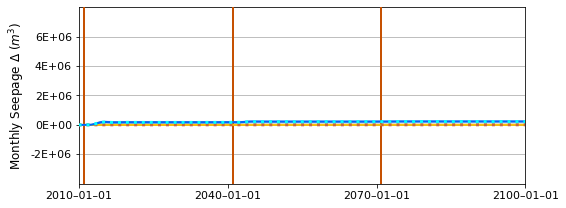

In [178]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 3.25)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinRE, MaxRE], linestyle='-', zorder=3,
           linewidth=2, color='xkcd:dark orange', label="Climate Normals Boundary")
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinRE, MaxRE], linestyle='-',
           linewidth=2, color='xkcd:dark orange', zorder=3 )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinRE, MaxRE], linestyle='-',
           linewidth=2, color='xkcd:dark orange', zorder=3 )
cc90 = ax11.fill( DTTimeList, CC_FlRR1_RE_90, color='xkcd:sand', alpha=1.0, 
                  label="CC: 5–95th percentile range", zorder=2)
cc50 = ax11.fill( DTTimeList, CC_FlRR1_RE_IQR, color='xkcd:puce', alpha=1.0, 
                  label="CC: 25–75th percentile range", zorder=2)
ax11.plot( ForTimeList, CC_BFRR1_RE_Med, linestyle='-', zorder=4,
           linewidth=2, color='xkcd:goldenrod', label='CC: Median' )
ax11.plot( ForTimeList, CC_BFRR1_RE_Ave, linestyle=':', zorder=4,
           linewidth=3, color='xkcd:terracotta', label='CC: Mean' )
ba90 = ax11.fill( DTTimeList, BA_FlRR1_RE_90, color='xkcd:pastel blue', alpha=0.55, 
                  label="LULCCC: 5–95th percentile range", zorder=2 )
ba50 = ax11.fill( DTTimeList, BA_FlRR1_RE_IQR, color='xkcd:denim blue', alpha=0.55, 
                  label="LULCCC: 25–75th percentile range", zorder=2 )
ax11.plot( ForTimeList, BA_BFRR1_RE_Med, linestyle='-', zorder=4,
           linewidth=2, color='xkcd:bright blue', label='LULCCC: Median' )
ax11.plot( ForTimeList, BA_BFRR1_RE_Ave, linestyle=':', zorder=4,
           linewidth=3, color='xkcd:cyan', label='LULCCC: Mean' )
ax11.set_xticks( [ dt.datetime(2010, 1, 1), dt.datetime(2040, 1, 1), dt.datetime(2070, 1, 1),
                  dt.datetime(2100, 1, 1) ] )
ax11.set_xlim( (dt.datetime(2010, 1, 1), dt.datetime(2100, 1, 1)))
ax11.set_yticks( reTicks )
ax11.set_ylim( (MinRE, MaxRE) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Monthly Seepage $\Delta$ ($m^{3}$)', fontsize=12 )
#ax11.legend( loc='upper center', fontsize=10, framealpha=1.0, ncol=3 )
ax11.tick_params(axis='both', which='major', labelsize=11 )
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0E}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y–%m–%d") )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

### Reach 5

In [179]:
InFiler = os.path.normpath( os.path.join( IN_DIR, XLSX_ROOT % ( REG_SIM_ROOT % "RR5" ) ) )
CCRR5_1_AET = pd.read_excel( InFiler, sheet_name="AET_1", header=0, names=RdHds, index_col=0, parse_dates=True )
CCRR5_2_AET = pd.read_excel( InFiler, sheet_name="AET_2", header=0, names=RdHds, index_col=0, parse_dates=True )
CCRR5_3_AET = pd.read_excel( InFiler, sheet_name="AET_3", header=0, names=RdHds, index_col=0, parse_dates=True )
CCRR5_4_AET = pd.read_excel( InFiler, sheet_name="AET_4", header=0, names=RdHds, index_col=0, parse_dates=True )
CCRR5_1_RO = pd.read_excel( InFiler, sheet_name="RO_1", header=0, names=RdHds, index_col=0, parse_dates=True )
CCRR5_2_RO = pd.read_excel( InFiler, sheet_name="RO_2", header=0, names=RdHds, index_col=0, parse_dates=True )
CCRR5_3_RO = pd.read_excel( InFiler, sheet_name="RO_3", header=0, names=RdHds, index_col=0, parse_dates=True )
CCRR5_4_RO = pd.read_excel( InFiler, sheet_name="RO_4", header=0, names=RdHds, index_col=0, parse_dates=True )

In [180]:
CCRR5_1_AET = CCRR5_1_AET * MultAFtoM3
CCRR5_2_AET = CCRR5_2_AET * MultAFtoM3
CCRR5_3_AET = CCRR5_3_AET * MultAFtoM3
CCRR5_4_AET = CCRR5_4_AET * MultAFtoM3
CCRR5_1_RO = CCRR5_1_RO * MultAFtoM3
CCRR5_2_RO = CCRR5_2_RO * MultAFtoM3
CCRR5_3_RO = CCRR5_3_RO * MultAFtoM3
CCRR5_4_RO = CCRR5_4_RO * MultAFtoM3

In [183]:
InFiler = os.path.normpath( os.path.join( IN_DIR, XLSX_ROOT % ( BAS_SIM_ROOT % "RR5" ) ) )
BARR5_1_AET = pd.read_excel( InFiler, sheet_name="AET_1", header=0, names=RdHds, index_col=0, parse_dates=True )
BARR5_2_AET = pd.read_excel( InFiler, sheet_name="AET_2", header=0, names=RdHds, index_col=0, parse_dates=True )
BARR5_3_AET = pd.read_excel( InFiler, sheet_name="AET_3", header=0, names=RdHds, index_col=0, parse_dates=True )
BARR5_4_AET = pd.read_excel( InFiler, sheet_name="AET_4", header=0, names=RdHds, index_col=0, parse_dates=True )
BARR5_1_RO = pd.read_excel( InFiler, sheet_name="RO_1", header=0, names=RdHds, index_col=0, parse_dates=True )
BARR5_2_RO = pd.read_excel( InFiler, sheet_name="RO_2", header=0, names=RdHds, index_col=0, parse_dates=True )
BARR5_3_RO = pd.read_excel( InFiler, sheet_name="RO_3", header=0, names=RdHds, index_col=0, parse_dates=True )
BARR5_4_RO = pd.read_excel( InFiler, sheet_name="RO_4", header=0, names=RdHds, index_col=0, parse_dates=True )

In [184]:
BARR5_1_AET = BARR5_1_AET * MultAFtoM3
BARR5_2_AET = BARR5_2_AET * MultAFtoM3
BARR5_3_AET = BARR5_3_AET * MultAFtoM3
BARR5_4_AET = BARR5_4_AET * MultAFtoM3
BARR5_1_RO = BARR5_1_RO * MultAFtoM3
BARR5_2_RO = BARR5_2_RO * MultAFtoM3
BARR5_3_RO = BARR5_3_RO * MultAFtoM3
BARR5_4_RO = BARR5_4_RO * MultAFtoM3

Make continuous time series

In [185]:
CCRR5_AET_DF = pd.concat( [CCRR5_1_AET, CCRR5_2_AET, CCRR5_3_AET, CCRR5_4_AET ])
CCRR5_RO_DF = pd.concat( [CCRR5_1_RO, CCRR5_2_RO, CCRR5_3_RO, CCRR5_4_RO ])

In [186]:
BARR5_AET_DF = pd.concat( [BARR5_1_AET, BARR5_2_AET, BARR5_3_AET, BARR5_4_AET ])
BARR5_RO_DF = pd.concat( [BARR5_1_RO, BARR5_2_RO, BARR5_3_RO, BARR5_4_RO ])

Butterworth filtering

In [187]:
wAr = CCRR5_AET_DF[StatsHdsList[95]].to_numpy()
CC_BFRR5_AET_95 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCRR5_AET_DF[StatsHdsList[5]].to_numpy()
CC_BFRR5_AET_05 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCRR5_AET_DF[StatsHdsList[75]].to_numpy()
CC_BFRR5_AET_75 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCRR5_AET_DF[StatsHdsList[25]].to_numpy()
CC_BFRR5_AET_25 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCRR5_AET_DF[StatsHdsList[50]].to_numpy()
CC_BFRR5_AET_Med = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCRR5_AET_DF[StatsHdsList[101]].to_numpy()
CC_BFRR5_AET_Ave = butter_lowpass_filter(wAr, CUTOFF, FS )

In [188]:
wAr = CCRR5_RO_DF[StatsHdsList[95]].to_numpy()
CC_BFRR5_RO_95 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCRR5_RO_DF[StatsHdsList[5]].to_numpy()
CC_BFRR5_RO_05 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCRR5_RO_DF[StatsHdsList[75]].to_numpy()
CC_BFRR5_RO_75 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCRR5_RO_DF[StatsHdsList[25]].to_numpy()
CC_BFRR5_RO_25 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCRR5_RO_DF[StatsHdsList[50]].to_numpy()
CC_BFRR5_RO_Med = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = CCRR5_RO_DF[StatsHdsList[101]].to_numpy()
CC_BFRR5_RO_Ave = butter_lowpass_filter(wAr, CUTOFF, FS )

In [189]:
wAr = BARR5_AET_DF[StatsHdsList[95]].to_numpy()
BA_BFRR5_AET_95 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BARR5_AET_DF[StatsHdsList[5]].to_numpy()
BA_BFRR5_AET_05 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BARR5_AET_DF[StatsHdsList[75]].to_numpy()
BA_BFRR5_AET_75 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BARR5_AET_DF[StatsHdsList[25]].to_numpy()
BA_BFRR5_AET_25 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BARR5_AET_DF[StatsHdsList[50]].to_numpy()
BA_BFRR5_AET_Med = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BARR5_AET_DF[StatsHdsList[101]].to_numpy()
BA_BFRR5_AET_Ave = butter_lowpass_filter(wAr, CUTOFF, FS )

In [190]:
wAr = BARR5_RO_DF[StatsHdsList[95]].to_numpy()
BA_BFRR5_RO_95 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BARR5_RO_DF[StatsHdsList[5]].to_numpy()
BA_BFRR5_RO_05 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BARR5_RO_DF[StatsHdsList[75]].to_numpy()
BA_BFRR5_RO_75 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BARR5_RO_DF[StatsHdsList[25]].to_numpy()
BA_BFRR5_RO_25 = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BARR5_RO_DF[StatsHdsList[50]].to_numpy()
BA_BFRR5_RO_Med = butter_lowpass_filter(wAr, CUTOFF, FS )
wAr = BARR5_RO_DF[StatsHdsList[101]].to_numpy()
BA_BFRR5_RO_Ave = butter_lowpass_filter(wAr, CUTOFF, FS )

Make the polygons for fills

In [191]:
CC_FlRR5_AET_90 = list( CC_BFRR5_AET_05 )
BackDTList = list( CC_BFRR5_AET_95 )
CC_BkFlRR5_AET_90 = BackDTList[::-1]
CC_FlRR5_AET_90.extend( CC_BkFlRR5_AET_90 )
CC_FlRR5_AET_IQR = list( CC_BFRR5_AET_25 )
BackDTList = list( CC_BFRR5_AET_75 )
CC_BkFlRR5_AET_IQR = BackDTList[::-1]
CC_FlRR5_AET_IQR.extend( CC_BkFlRR5_AET_IQR )

In [192]:
CC_FlRR5_RO_90 = list( CC_BFRR5_RO_05 )
BackDTList = list( CC_BFRR5_RO_95 )
CC_BkFlRR5_RO_90 = BackDTList[::-1]
CC_FlRR5_RO_90.extend( CC_BkFlRR5_RO_90 )
CC_FlRR5_RO_IQR = list( CC_BFRR5_RO_25 )
BackDTList = list( CC_BFRR5_RO_75 )
CC_BkFlRR5_RO_IQR = BackDTList[::-1]
CC_FlRR5_RO_IQR.extend( CC_BkFlRR5_RO_IQR )

In [193]:
BA_FlRR5_AET_90 = list( BA_BFRR5_AET_05 )
BackDTList = list( BA_BFRR5_AET_95 )
BA_BkFlRR5_AET_90 = BackDTList[::-1]
BA_FlRR5_AET_90.extend( BA_BkFlRR5_AET_90 )
BA_FlRR5_AET_IQR = list( BA_BFRR5_AET_25 )
BackDTList = list( BA_BFRR5_AET_75 )
BA_BkFlRR5_AET_IQR = BackDTList[::-1]
BA_FlRR5_AET_IQR.extend( BA_BkFlRR5_AET_IQR )

In [194]:
BA_FlRR5_RO_90 = list( BA_BFRR5_RO_05 )
BackDTList = list( BA_BFRR5_RO_95 )
BA_BkFlRR5_RO_90 = BackDTList[::-1]
BA_FlRR5_RO_90.extend( BA_BkFlRR5_RO_90 )
BA_FlRR5_RO_IQR = list( BA_BFRR5_RO_25 )
BackDTList = list( BA_BFRR5_RO_75 )
BA_BkFlRR5_RO_IQR = BackDTList[::-1]
BA_FlRR5_RO_IQR.extend( BA_BkFlRR5_RO_IQR )

#### Plots

In [207]:
MaxAET = max( CC_BFRR5_AET_95.max(), BA_BFRR5_AET_95.max() )
MinAET = min( CC_BFRR5_AET_05.min(), BA_BFRR5_AET_05.min() )
MaxAET, MinAET

(2222.4891435368513, 0.0)

In [208]:
MaxAET = 5000.0
MinAET = -500.0

In [209]:
aetTicks = [ 0.0, 1000.0, 2000.0, 3000.0, 4000.0 ]

In [210]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Results_CompRR5Zoom_AETDelta.svg" ) )
OutSVG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Results_CompRR5Zoom_AETDelta.svg'

In [211]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Results_CompRR5Zoom_AETDelta.png" ) )
OutPNG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Results_CompRR5Zoom_AETDelta.png'

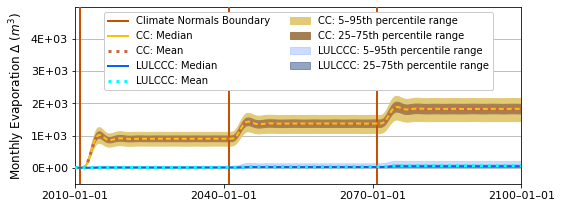

In [212]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 3.25)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinAET, MaxAET], linestyle='-', zorder=3,
           linewidth=2, color='xkcd:dark orange', label="Climate Normals Boundary")
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinAET, MaxAET], linestyle='-',
           linewidth=2, color='xkcd:dark orange', zorder=3 )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinAET, MaxAET], linestyle='-',
           linewidth=2, color='xkcd:dark orange', zorder=3 )
cc90 = ax11.fill( DTTimeList, CC_FlRR5_AET_90, color='xkcd:sand', alpha=1.0, 
                  label="CC: 5–95th percentile range", zorder=2)
cc50 = ax11.fill( DTTimeList, CC_FlRR5_AET_IQR, color='xkcd:puce', alpha=1.0, 
                  label="CC: 25–75th percentile range", zorder=2)
ax11.plot( ForTimeList, CC_BFRR5_AET_Med, linestyle='-', zorder=4,
           linewidth=2, color='xkcd:goldenrod', label='CC: Median' )
ax11.plot( ForTimeList, CC_BFRR5_AET_Ave, linestyle=':', zorder=4,
           linewidth=3, color='xkcd:terracotta', label='CC: Mean' )
ba90 = ax11.fill( DTTimeList, BA_FlRR5_AET_90, color='xkcd:pastel blue', alpha=0.55, 
                  label="LULCCC: 5–95th percentile range", zorder=2 )
ba50 = ax11.fill( DTTimeList, BA_FlRR5_AET_IQR, color='xkcd:denim blue', alpha=0.55, 
                  label="LULCCC: 25–75th percentile range", zorder=2 )
ax11.plot( ForTimeList, BA_BFRR5_AET_Med, linestyle='-', zorder=4,
           linewidth=2, color='xkcd:bright blue', label='LULCCC: Median' )
ax11.plot( ForTimeList, BA_BFRR5_AET_Ave, linestyle=':', zorder=4,
           linewidth=3, color='xkcd:cyan', label='LULCCC: Mean' )
ax11.set_xticks( [ dt.datetime(2010, 1, 1), dt.datetime(2040, 1, 1), dt.datetime(2070, 1, 1),
                  dt.datetime(2100, 1, 1) ] )
ax11.set_xlim( (dt.datetime(2010, 1, 1), dt.datetime(2100, 1, 1)))
ax11.set_yticks( aetTicks )
ax11.set_ylim( (MinAET, MaxAET) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Monthly Evaporation $\Delta$ ($m^{3}$)', fontsize=12 )
ax11.legend( loc='upper center', fontsize=10, framealpha=1.0, ncol=2 )
ax11.tick_params(axis='both', which='major', labelsize=11 )
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0E}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y–%m–%d") )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

In [213]:
MaxAET = 8000000.0
MinAET = -4000000.0

In [214]:
aetTicks = [ -2000000.0, 0.0, 2000000.0, 4000000.0, 6000000.0 ]

In [215]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Results_CompRR5_AETDelta.svg" ) )
OutSVG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Results_CompRR5_AETDelta.svg'

In [216]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Results_CompRR5_AETDelta.png" ) )
OutPNG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Results_CompRR5_AETDelta.png'

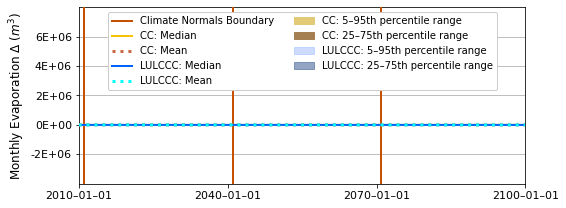

In [217]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 3.25)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinAET, MaxAET], linestyle='-', zorder=3,
           linewidth=2, color='xkcd:dark orange', label="Climate Normals Boundary")
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinAET, MaxAET], linestyle='-',
           linewidth=2, color='xkcd:dark orange', zorder=3 )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinAET, MaxAET], linestyle='-',
           linewidth=2, color='xkcd:dark orange', zorder=3 )
cc90 = ax11.fill( DTTimeList, CC_FlRR5_AET_90, color='xkcd:sand', alpha=1.0, 
                  label="CC: 5–95th percentile range", zorder=2)
cc50 = ax11.fill( DTTimeList, CC_FlRR5_AET_IQR, color='xkcd:puce', alpha=1.0, 
                  label="CC: 25–75th percentile range", zorder=2)
ax11.plot( ForTimeList, CC_BFRR5_AET_Med, linestyle='-', zorder=4,
           linewidth=2, color='xkcd:goldenrod', label='CC: Median' )
ax11.plot( ForTimeList, CC_BFRR5_AET_Ave, linestyle=':', zorder=4,
           linewidth=3, color='xkcd:terracotta', label='CC: Mean' )
ba90 = ax11.fill( DTTimeList, BA_FlRR5_AET_90, color='xkcd:pastel blue', alpha=0.55, 
                  label="LULCCC: 5–95th percentile range", zorder=2 )
ba50 = ax11.fill( DTTimeList, BA_FlRR5_AET_IQR, color='xkcd:denim blue', alpha=0.55, 
                  label="LULCCC: 25–75th percentile range", zorder=2 )
ax11.plot( ForTimeList, BA_BFRR5_AET_Med, linestyle='-', zorder=4,
           linewidth=2, color='xkcd:bright blue', label='LULCCC: Median' )
ax11.plot( ForTimeList, BA_BFRR5_AET_Ave, linestyle=':', zorder=4,
           linewidth=3, color='xkcd:cyan', label='LULCCC: Mean' )
ax11.set_xticks( [ dt.datetime(2010, 1, 1), dt.datetime(2040, 1, 1), dt.datetime(2070, 1, 1),
                  dt.datetime(2100, 1, 1) ] )
ax11.set_xlim( (dt.datetime(2010, 1, 1), dt.datetime(2100, 1, 1)))
ax11.set_yticks( aetTicks )
ax11.set_ylim( (MinAET, MaxAET) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Monthly Evaporation $\Delta$ ($m^{3}$)', fontsize=12 )
ax11.legend( loc='upper center', fontsize=10, framealpha=1.0, ncol=2 )
ax11.tick_params(axis='both', which='major', labelsize=11 )
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0E}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y–%m–%d") )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

In [218]:
MaxRO = max( CC_BFRR5_RO_95.max(), BA_BFRR5_RO_95.max() )
MinRO = min( CC_BFRR5_RO_05.min(), BA_BFRR5_RO_05.min() )
MaxRO, MinRO

(5277275.712502449, -130760.59958390634)

In [219]:
MaxRO = 8000000.0
MinRO = -4000000.0

In [220]:
roTicks = [ -2000000.0, 0.0, 2000000.0, 4000000.0, 6000000.0 ]

In [221]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Results_CompRR5_RODelta.svg" ) )
OutSVG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Results_CompRR5_RODelta.svg'

In [222]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Results_CompRR5_RODelta.png" ) )
OutPNG

'C:\\Users\\nmart\\Documents\\CC_Plots\\Results_CompRR5_RODelta.png'

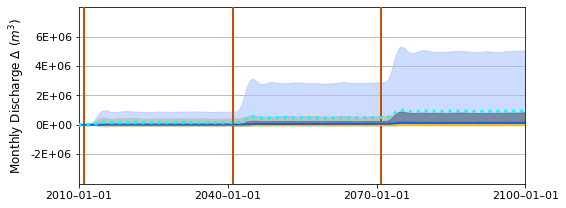

In [223]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 3.25)
ax11 = Fig1.add_subplot(111)
ax11.plot( [TP_DICT[2][0], TP_DICT[2][0]], [MinRO, MaxRO], linestyle='-', zorder=3,
           linewidth=2, color='xkcd:dark orange', label="Climate Normals Boundary")
ax11.plot( [TP_DICT[3][0], TP_DICT[3][0]], [MinRO, MaxRO], linestyle='-',
           linewidth=2, color='xkcd:dark orange', zorder=3 )
ax11.plot( [TP_DICT[4][0], TP_DICT[4][0]], [MinRO, MaxRO], linestyle='-',
           linewidth=2, color='xkcd:dark orange', zorder=3 )
cc90 = ax11.fill( DTTimeList, CC_FlRR5_RO_90, color='xkcd:sand', alpha=1.0, 
                  label="CC: 5–95th percentile range", zorder=2)
cc50 = ax11.fill( DTTimeList, CC_FlRR5_RO_IQR, color='xkcd:puce', alpha=1.0, 
                  label="CC: 25–75th percentile range", zorder=2)
ax11.plot( ForTimeList, CC_BFRR5_RO_Med, linestyle='-', zorder=4,
           linewidth=2, color='xkcd:goldenrod', label='CC: Median' )
ax11.plot( ForTimeList, CC_BFRR5_RO_Ave, linestyle=':', zorder=4,
           linewidth=3, color='xkcd:terracotta', label='CC: Mean' )
ba90 = ax11.fill( DTTimeList, BA_FlRR5_RO_90, color='xkcd:pastel blue', alpha=0.55, 
                  label="LULCCC: 5–95th percentile range", zorder=2 )
ba50 = ax11.fill( DTTimeList, BA_FlRR5_RO_IQR, color='xkcd:denim blue', alpha=0.55, 
                  label="LULCCC: 25–75th percentile range", zorder=2 )
ax11.plot( ForTimeList, BA_BFRR5_RO_Med, linestyle='-', zorder=4,
           linewidth=2, color='xkcd:bright blue', label='LULCCC: Median' )
ax11.plot( ForTimeList, BA_BFRR5_RO_Ave, linestyle=':', zorder=4,
           linewidth=3, color='xkcd:cyan', label='LULCCC: Mean' )
ax11.set_xticks( [ dt.datetime(2010, 1, 1), dt.datetime(2040, 1, 1), dt.datetime(2070, 1, 1),
                  dt.datetime(2100, 1, 1) ] )
ax11.set_xlim( (dt.datetime(2010, 1, 1), dt.datetime(2100, 1, 1)))
ax11.set_yticks( roTicks )
ax11.set_ylim( (MinRO, MaxRO) )
ax11.grid(True, axis='y', which='both')
ax11.set_ylabel('Monthly Discharge $\Delta$ ($m^{3}$)', fontsize=12 )
#ax11.legend( loc='upper center', fontsize=10, framealpha=1.0, ncol=3 )
ax11.tick_params(axis='both', which='major', labelsize=11 )
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0E}" ) )
ax11.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y–%m–%d") )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )